<a id="cont"></a>

## Table of Contents

<a href=#one>1. Introduction</a>

<a href=#two>2. Problem Statement</a>

<a href=#three>3. Data Preprocessing and Cleaning</a>

<a href=#four>4. Exploratory Data Analysis</a>

<a href=#five>5. Modeling building</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Conclusion</a>

 <a id="one"></a>
## 1. Introduction
<a href=#cont>Back to Table of Contents</a>

**Climate change**  is change in global or regional climate patterns, in particular a change apparent from the mid to late 20th century onwards and attributed largely to the increased levels of atmospheric carbon dioxide produced by the use of fossil fuels. The effects of climate change are already visible, including extreme weather events, changes in the timing of seasonal events (e.g., earlier flowering of plants),sea level rise, and declines in Arctic sea ice. The ocean has taken up between 20% and 30% of human-induced atmospheric carbon dioxide since the 1980s, leading to ocean acidification. The ocean is also warming and since 1970 has absorbed more than 90% of the excess heat in the climate system.

Human activities (primarily the burning of fossil fuels) have fundamentally increased the concentration of greenhouse gases in Earth’s atmosphere, warming the planet. On that note, people have different opinions about climate change, the polarizing believes can be mainly be divided into two groups people that believe in the made-made climate change and those that do not.

Since the explosion of big data and the popularization of social media, we have seen a much higher demand on text data by organizations(so that they gain insights). Twitter is a wildly popular microblogging service. It involves writing Tweets, which are short updates of a maximum of 140 characters that tell your followers what you are up to. Although your Tweets are technically supposed to answer the question, "What are you doing?" Twitter has moved far beyond that. Tweets are used to share stories, link to photos, promote content, break news and a whole lot more. Twitter has also become an incredibly important tool for social media marketing professionals. One way to gain insights from a social media platform like twitter, is by using a machine learning tool called text analtics.

Text analytics combines a set of machine learning, statistical and linguistic techniques,Text analytics is the way to unlock the meaning from all of this unstructured text and it lets you uncover patterns and theme. It uses a variety of techniques – sentiment analysis, topic modelling, named entity recognition, term frequency, and event extraction. For this predict we will be analysing the sentiments from people's tweets.Sentiment analysis is the process of using natural language processing, text analysis, and statistics to analyze customer sentiment. The best businesses understand the sentiment of their customers—what people are saying, how they’re saying it, and what they mean. Customer sentiment can be found in tweets, comments, reviews, or other places where people mention brands.

<a id="two"></a>
## 2. Problem Statement
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

**Project Objective** : `Determing whether or not people believe in climate change, based of their novel tweet data and classifying that using the Natural Language Processing (NLP)  model.`

<a id="three"></a>
## 3. Data Preprocessing and Cleaning
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

### 3.1 Starting a Comet Experiment

In [1]:
# import comet_ml at the top of your file
from comet_ml import Experiment

In [2]:
# Create an experiment with your api key
experiment = Experiment(
    api_key="7326zYRgcaNQ6zq68IXkPkDWn",
    project_name="general",
    workspace="bohlalek",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/bohlalek/general/0366155bd1bc4b0db62def00d73a8ca4

COMET INFO: Couldn't find a Git repository in 'C:\\Users\\Bohlale\\Desktop\\Classification Predict\\Advanced_Classification_Predict-student_data-2780' and lookings in parents. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`


### 3.2 Importing packages

In [4]:
#Import warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

# imports for Natural Language  Processing
import pandas as pd
import numpy as np
import nltk
import string
import re
from sklearn.pipeline import Pipeline
import pickle


# feature extractioin
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocessing
#import contractions
import os
from nltk.tokenize import WordPunctTokenizer
from bs4 import BeautifulSoup
from textblob import TextBlob
from collections import Counter
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.stem.porter import *
import spacy
from spacy import displacy
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split

# classification models
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier


# Hyperparameter tunning methods
#import parfit.parfit as pf
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid

# metrics
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# imports for data visualisation
import seaborn as sns
from PIL import Image
from scipy import stats
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
from sklearn.metrics import plot_roc_curve
from wordcloud import WordCloud, ImageColorGenerator
from scikitplot.metrics import plot_roc, plot_confusion_matrix
%matplotlib inline

### 3.2 Loading the data

In [5]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test_with_no_labels.csv')
#Create a copy for EDA
train_eda = df_train.copy()

# Create copies for modeling
train = df_train.copy()
test = df_test.copy()

In [6]:
df_train.head()

sentiment                                            message  tweetid
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221
1          1  It's not like we lack evidence of anthropogeni...   126103
2          2  RT @RawStory: Researchers say we have three ye...   698562
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954

In [7]:
df_test.head()

message  tweetid
0  Europe will now be looking to China to make su...   169760
1  Combine this with the polling of staffers re c...    35326
2  The scary, unimpeachable evidence that climate...   224985
3  @Karoli @morgfair @OsborneInk @dailykos \nPuti...   476263
4  RT @FakeWillMoore: 'Female orgasms cause globa...   872928

The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, `43943` tweets were collected. Each tweet `sentiment` is labelled as one of the following:

* 2 - **News**: the tweet links to factual news about climate change 
* 1 - **Pro**: the tweet supports the belief of man-made climate change 
* 0 - **Neutral**: the tweet neither supports nor refutes the belief of man-made climate change
* -1 - **Anti**: the tweet does not believe in man-made climate change

Variable definitions <br>
* **tweetid**: Twitter unique id
* **message**: Message of a tweet
* **sentiment**: Sentiment of tweet message

### 3.3 Data Preprocessing

In [8]:
df_train.info()#The info command confirms our categorical and numerical features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [9]:
#Checking if there are missing values
df_train.isna().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   sentiment  15819 non-null  bool 
 1   message    15819 non-null  bool 
 2   tweetid    15819 non-null  bool 
dtypes: bool(3)
memory usage: 46.5 KB


In [10]:
##the total number of null values appearing in each feature, for confirmation
df_train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [11]:
#the total number of null values appearing in each feature of the test dataset
df_test.isnull().sum()

message    0
tweetid    0
dtype: int64

looks like there are no null values in both datasets

#### Part-of-Speech 
refers to the category of a word according to its syntactic function, like if it’s a verb, noun, etc. For example:
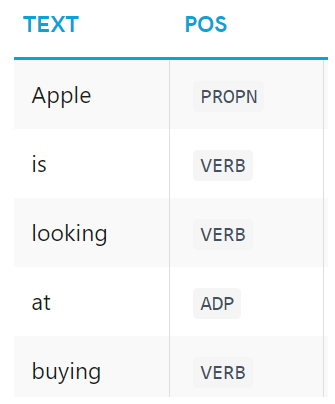

In [12]:
# Part of Speech for modeling
def POS(word):
    """
    This function gets the part of speech.
    Takes the arguments:
        word, string data type.
    Matches word with synonyms
    Tags word and count tags.
    Returns The most common tag, the tag with the highest count, ex: n for Noun, string data type.

    """
    # Initializing Counter class object
    pos_counts = Counter()
    # Synonyms matching
    probable_part_of_speech = wordnet.synsets(word)
    # Taging and counting tags
    pos_counts["n"] = len([i for i in probable_part_of_speech if i.pos()=="n"])# Noun
    pos_counts["v"] = len([i for i in probable_part_of_speech if i.pos()=="v"])# Verb
    pos_counts["a"] = len([i for i in probable_part_of_speech if i.pos()=="a"])# Adjective
    pos_counts["r"] = len([i for i in probable_part_of_speech if i.pos()=="r"])# Adverb
    # The most common tag, the tag with the highest count, ex: n for Noun
    part_of_speech = pos_counts.most_common(1)[0][0]
    return part_of_speech

**Extracting mentions and hashtags** means you take these mentions and hashtags in a tweet and put them in variable (s) for later use.

In [13]:
   def extractor(df):

    """" 
        Returns a DataFrame with three additional columns: 
        "hashtags", "mentions" and "url"
         Args:
             DataFrame: DateFrame with Data,Index and Colums
        Return:
             DataFrame: A DataFrame with additional columns with data
        Egs:
             df['new colum'] = col_name
    """
    # Extract hashtags
    tweets = df['message']
    df['hashtags'] = df.message. str.lower().str.findall(r'#.*?(?=\s|$)')
    htags = df['hashtags']
    df['hashtags'] = htags.apply(lambda x: np.nan if len(x) == 0 else x)
    
    # Extract mentions
    df['mentions'] = df.message. str.lower().str.findall(r'@\w*')
    mtags = df['mentions']
    df['mentions'] = mtags.apply(lambda x: np.nan if len(x) == 0 else x)
    
    # Extract url
    df['url'] = df.message. str.lower().str.findall(r'http\S+|www.\S+')
    urltags = df['url']
    df['url'] = urltags.apply(lambda x: np.nan if len(x) == 0 else x)
    
    return df

In [14]:
extractor(df_train)

sentiment                                            message  tweetid  \
0              1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1              1  It's not like we lack evidence of anthropogeni...   126103   
2              2  RT @RawStory: Researchers say we have three ye...   698562   
3              1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4              1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   
...          ...                                                ...      ...   
15814          1  RT @ezlusztig: They took down the material on ...    22001   
15815          2  RT @washingtonpost: How climate change could b...    17856   
15816          0  notiven: RT: nytimesworld :What does Trump act...   384248   
15817         -1  RT @sara8smiles: Hey liberals the climate chan...   819732   
15818          0  RT @Chet_Cannon: .@kurteichenwald's 'climate c...   806319   

               hashtags                         mentions  \
0                   NaN                      [@mashable]   
1                   NaN                              NaN   
2                   NaN                      [@rawstory]   
3      [#todayinmaker#]                              NaN   
4      [#electionnight]               [@soynoviodetodas]   
...                 ...                              ...   
15814               NaN                     [@ezlusztig]   
15815               NaN                [@washingtonpost]   
15816               NaN                              NaN   
15817    [#agenda2030.]                   [@sara8smiles]   
15818               NaN  [@chet_cannon, @kurteichenwald]   

                                                   url  
0                            [https://t.co/yelvcefxkc]  
1                                                  NaN  
2      [https://t.co/wdt0kdur2f, https://t.co/z0anpt…]  
3                            [https://t.co/44wotxtlcd]  
4                                                  NaN  
...                                                ...  
15814                                      [https://…]  
15815                        [https://t.co/rpfgvb2plq]  
15816                              [https://t.co/0mp2]  
15817                                              NaN  
15818                        [https://t.co/lp7uufcxdq]  

[15819 rows x 6 columns]

**Remove Unnecessary Information on Message**

**Remove Twitter Handles (@user)**
Twitter handles are masked as @user due to concerns surrounding privacy. Thus, twitter handles do note necessarily give necessary information around the overall tweet. Thus we will remove them

In [15]:
# Remove URLs
df_train['message'] = df_train['message'].str.replace('http\S+|www.\S+', '', case=False)

# Remove twitter handles (@user)
df_train['message'] = df_train['message'].str.replace('@\w*', '', case=False)

# Removal hashtags
df_train['message'] = df_train['message'].str.replace('#.*?(?=\s|$)', '', case=False)

# Remove 'RT'
df_train['message'] = df_train['message'].str.replace('RT', '', case=False)

# Remove stopwords
df_train.head()

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1          1  It's not like we lack evidence of anthropogeni...   126103   
2          2   : Researchers say we have three years to act ...   698562   
3          1   WIRED : 2016 was a pivotal year in the war on...   573736   
4          1   : It's 2016, and a racist, sexist, climate ch...   466954   

           hashtags            mentions  \
0               NaN         [@mashable]   
1               NaN                 NaN   
2               NaN         [@rawstory]   
3  [#todayinmaker#]                 NaN   
4  [#electionnight]  [@soynoviodetodas]   

                                               url  
0                        [https://t.co/yelvcefxkc]  
1                                              NaN  
2  [https://t.co/wdt0kdur2f, https://t.co/z0anpt…]  
3                        [https://t.co/44wotxtlcd]  
4                                              NaN

**Tokenization**
Tokenization is the process of tokenizing or splitting a string, text into a list of tokens. One can think of token as parts like a word is a token in a sentence, and a sentence is a token in a paragraph.
Now we will tokenize all the cleaned tweets in our dataset. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

**Remove Punctuation, special characters and Numbers**
With regards to punctuation, special characters and numbers, many if not all of them do not change or determine the over all sentiment of a tweet. Thus, it is important to remove these from the tweets

**Removing short words**
A vast majoity of short words which are less than 1 letters long do not add much information surrounding the sentiment.

In [16]:
# Clean tweets
def clean_tweets(df):
    '''
    This function cleans the tweets by tokenizing, removing punctuation, 
    removing digits and removing 1 character tokens
    
    '''

    # tokenizing the tweets
    clean_tweets = df['message'].apply(TweetTokenizer().tokenize) ## first we tokenize

    # remove punctuation
    clean_tweets = clean_tweets.apply(lambda x : [token for token in x if token not in string.punctuation])

    # removing digits from the tweets
    clean_tweets = clean_tweets.apply(lambda x: [token for token in x if token not in list(string.digits)])

    # removing all one character tokens
    clean_tweets = clean_tweets.apply(lambda x: [token for token in x if len(token) > 1])
    
    df['cleaned_tweets'] = clean_tweets
    
    return df['cleaned_tweets']

In [17]:
clean_tweets(df_train)

0        [PolySciMajor, EPA, chief, doesn't, think, car...
1        [It's, not, like, we, lack, evidence, of, anth...
2        [Researchers, say, we, have, three, years, to,...
3        [WIRED, 2016, was, pivotal, year, in, the, war...
4        [It's, 2016, and, racist, sexist, climate, cha...
                               ...                        
15814    [They, took, down, the, material, on, global, ...
15815    [How, climate, change, could, be, breaking, up...
15816    [notiven, nytimesworld, What, does, Trump, act...
15817    [Hey, liberals, the, climate, change, crap, is...
15818         [climate, change, equation, in, screenshots]
Name: cleaned_tweets, Length: 15819, dtype: object

**Stop words** are words which do not contain important significance to be used in Search Queries. Usually these words are filtered out from search queries because they return a vast amount of unnecessary information.  Printing out the stopwords for English.

In [18]:
nltk.download('stopwords')

stop = stopwords.words('english')

# Convert to lower case
df_train['cleaned_tweets'] = df_train['cleaned_tweets'].apply(lambda x: [word.lower() for word in x])

# Remove stopwords
df_train['no_stopwords'] = df_train['cleaned_tweets'].apply(lambda x: [item for item in x if item not in stop])

df_train.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bohlale\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1          1  It's not like we lack evidence of anthropogeni...   126103   
2          2   : Researchers say we have three years to act ...   698562   
3          1   WIRED : 2016 was a pivotal year in the war on...   573736   
4          1   : It's 2016, and a racist, sexist, climate ch...   466954   

           hashtags            mentions  \
0               NaN         [@mashable]   
1               NaN                 NaN   
2               NaN         [@rawstory]   
3  [#todayinmaker#]                 NaN   
4  [#electionnight]  [@soynoviodetodas]   

                                               url  \
0                        [https://t.co/yelvcefxkc]   
1                                              NaN   
2  [https://t.co/wdt0kdur2f, https://t.co/z0anpt…]   
3                        [https://t.co/44wotxtlcd]   
4                                              NaN   

                                      cleaned_tweets  \
0  [polyscimajor, epa, chief, doesn't, think, car...   
1  [it's, not, like, we, lack, evidence, of, anth...   
2  [researchers, say, we, have, three, years, to,...   
3  [wired, 2016, was, pivotal, year, in, the, war...   
4  [it's, 2016, and, racist, sexist, climate, cha...   

                                        no_stopwords  
0  [polyscimajor, epa, chief, think, carbon, diox...  
1  [like, lack, evidence, anthropogenic, global, ...  
2  [researchers, say, three, years, act, climate,...  
3  [wired, 2016, pivotal, year, war, climate, cha...  
4  [2016, racist, sexist, climate, change, denyin...

In [19]:
sorted(stopwords.words('english'))[0:10]

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']

**Remove collection words**
Collection words are the words that you used to query your data from Twitter. In our case 'climatechange', 'climate', 'change' are the query words.

In [20]:
all_words = ['climatechange', 'climate', 'change']
df_train['no_allwords'] = [[a for a in word if not a in all_words]
                 for word in df_train['no_stopwords']]

df_train.head()

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1          1  It's not like we lack evidence of anthropogeni...   126103   
2          2   : Researchers say we have three years to act ...   698562   
3          1   WIRED : 2016 was a pivotal year in the war on...   573736   
4          1   : It's 2016, and a racist, sexist, climate ch...   466954   

           hashtags            mentions  \
0               NaN         [@mashable]   
1               NaN                 NaN   
2               NaN         [@rawstory]   
3  [#todayinmaker#]                 NaN   
4  [#electionnight]  [@soynoviodetodas]   

                                               url  \
0                        [https://t.co/yelvcefxkc]   
1                                              NaN   
2  [https://t.co/wdt0kdur2f, https://t.co/z0anpt…]   
3                        [https://t.co/44wotxtlcd]   
4                                              NaN   

                                      cleaned_tweets  \
0  [polyscimajor, epa, chief, doesn't, think, car...   
1  [it's, not, like, we, lack, evidence, of, anth...   
2  [researchers, say, we, have, three, years, to,...   
3  [wired, 2016, was, pivotal, year, in, the, war...   
4  [it's, 2016, and, racist, sexist, climate, cha...   

                                        no_stopwords  \
0  [polyscimajor, epa, chief, think, carbon, diox...   
1  [like, lack, evidence, anthropogenic, global, ...   
2  [researchers, say, three, years, act, climate,...   
3  [wired, 2016, pivotal, year, war, climate, cha...   
4  [2016, racist, sexist, climate, change, denyin...   

                                         no_allwords  
0  [polyscimajor, epa, chief, think, carbon, diox...  
1  [like, lack, evidence, anthropogenic, global, ...  
2        [researchers, say, three, years, act, late]  
3                  [wired, 2016, pivotal, year, war]  
4  [2016, racist, sexist, denying, bigot, leading...

In [21]:
#Most frequent words
from collections import Counter
cnt = Counter()
for message in df_train['no_stopwords'].values:
    for word in message:
        cnt[word] += 1

**Map the sentiment class by name**

In [22]:
df_train['sent_labels']  = df_train['sentiment'].map({-1: 'Anti',0:'Neutral', 1:'Pro', 2:'News'})
train_eda['sent_labels']  = df_train['sentiment'].map({-1: 'Anti',0:'Neutral', 1:'Pro', 2:'News'})

**Get the length of each raw tweet**

In [23]:
df_train['text_length'] = train_eda['message'].apply(lambda x: len(x))

**Separate Dataframes of Tweets for each Sentiment**

In [24]:
# Dataframe for neutral tweets
neutral_df = df_train[df_train['sentiment'] == 0]
neutral_df.head()

sentiment                                            message  tweetid  \
19          0  Calum: *tweets abt reunitingish w the cast*\n-...   547924   
22          0  we also met this guy, he let us in on some tru...    67545   
30          0   are these the same scientists that denounce c...   365051   
39          0  We’ ve dealt with simple issues like climate c...   403368   
43          0   : Win probability is bullshit man. I saw the ...   326916   

    hashtags        mentions                        url  \
19       NaN             NaN                        NaN   
22       NaN             NaN  [https://t.co/q7yomcmzaj]   
30       NaN      [@jnp_ftw]                        NaN   
39  [#qanda]             NaN                        NaN   
43       NaN  [@andrewsharp]                        NaN   

                                       cleaned_tweets  \
19  [calum, tweets, abt, reunitingish, the, cast, ...   
22  [we, also, met, this, guy, he, let, us, in, on...   
30  [are, these, the, same, scientists, that, deno...   
39  [we, ve, dealt, with, simple, issues, like, cl...   
43  [win, probability, is, bullshit, man, saw, the...   

                                         no_stopwords  \
19  [calum, tweets, abt, reunitingish, cast, sees,...   
22  [also, met, guy, let, us, truth, climate, chan...   
30    [scientists, denounce, climate, change, choice]   
39  [dealt, simple, issues, like, climate, change,...   
43  [win, probability, bullshit, man, saw, nba, fi...   

                                          no_allwords sent_labels  text_length  
19  [calum, tweets, abt, reunitingish, cast, sees,...     Neutral          140  
22  [also, met, guy, let, us, truth, gay, people, ...     Neutral          121  
30                     [scientists, denounce, choice]     Neutral           86  
39  [dealt, simple, issues, like, energy, policy, ...     Neutral          115  
43  [win, probability, bullshit, man, saw, nba, fi...     Neutral          120

In [25]:
# Dataframe for pro tweets
pro_df = df_train[df_train['sentiment'] == 1]
pro_df.head(2)

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1          1  It's not like we lack evidence of anthropogeni...   126103   

  hashtags     mentions                        url  \
0      NaN  [@mashable]  [https://t.co/yelvcefxkc]   
1      NaN          NaN                        NaN   

                                      cleaned_tweets  \
0  [polyscimajor, epa, chief, doesn't, think, car...   
1  [it's, not, like, we, lack, evidence, of, anth...   

                                        no_stopwords  \
0  [polyscimajor, epa, chief, think, carbon, diox...   
1  [like, lack, evidence, anthropogenic, global, ...   

                                         no_allwords sent_labels  text_length  
0  [polyscimajor, epa, chief, think, carbon, diox...         Pro          140  
1  [like, lack, evidence, anthropogenic, global, ...         Pro           62

In [26]:
# Dataframe for anti tweets
anti_df = df_train[df_train['sentiment'] == -1]
anti_df.head(2)

sentiment                                            message  tweetid  \
28         -1  Sally Kohn’s latest evidence of climate change...   355491   
46         -1   Carbon Tax is a Globalist idea to enslave the...    61141   

   hashtags            mentions                        url  \
28      NaN      [@twitchyteam]  [https://t.co/mhkzogl9vt]   
46      NaN  [@realdonaldtrump]                        NaN   

                                       cleaned_tweets  \
28  [sally, kohn, latest, evidence, of, climate, c...   
46  [carbon, tax, is, globalist, idea, to, enslave...   

                                         no_stopwords  \
28  [sally, kohn, latest, evidence, climate, chang...   
46  [carbon, tax, globalist, idea, enslave, world'...   

                                          no_allwords sent_labels  text_length  
28  [sally, kohn, latest, evidence, proves, sma, p...        Anti          139  
46  [carbon, tax, globalist, idea, enslave, world'...        Anti          137

In [27]:
# Dataframe for news tweets
news_df = df_train[df_train['sentiment'] == 2]
news_df.head(2)

sentiment                                            message  tweetid  \
2           2   : Researchers say we have three years to act ...   698562   
12          2   : We only have a 5 percent chance of avoiding...   454673   

   hashtags     mentions                                              url  \
2       NaN  [@rawstory]  [https://t.co/wdt0kdur2f, https://t.co/z0anpt…]   
12      NaN  [@tveitdal]      [https://t.co/xubtqnxhkk, https://t.co/of…]   

                                       cleaned_tweets  \
2   [researchers, say, we, have, three, years, to,...   
12  [we, only, have, percent, chance, of, avoiding...   

                                         no_stopwords  \
2   [researchers, say, three, years, act, climate,...   
12  [percent, chance, avoiding, dangerous, global,...   

                                          no_allwords sent_labels  text_length  
2         [researchers, say, three, years, act, late]        News          140  
12  [percent, chance, avoiding, dangerous, global,...        News          140

<a id="four"></a>
## 4. Explanatory Data Analysis
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

### 4.1 Distribution of Sentiments

In [28]:
sns.set()

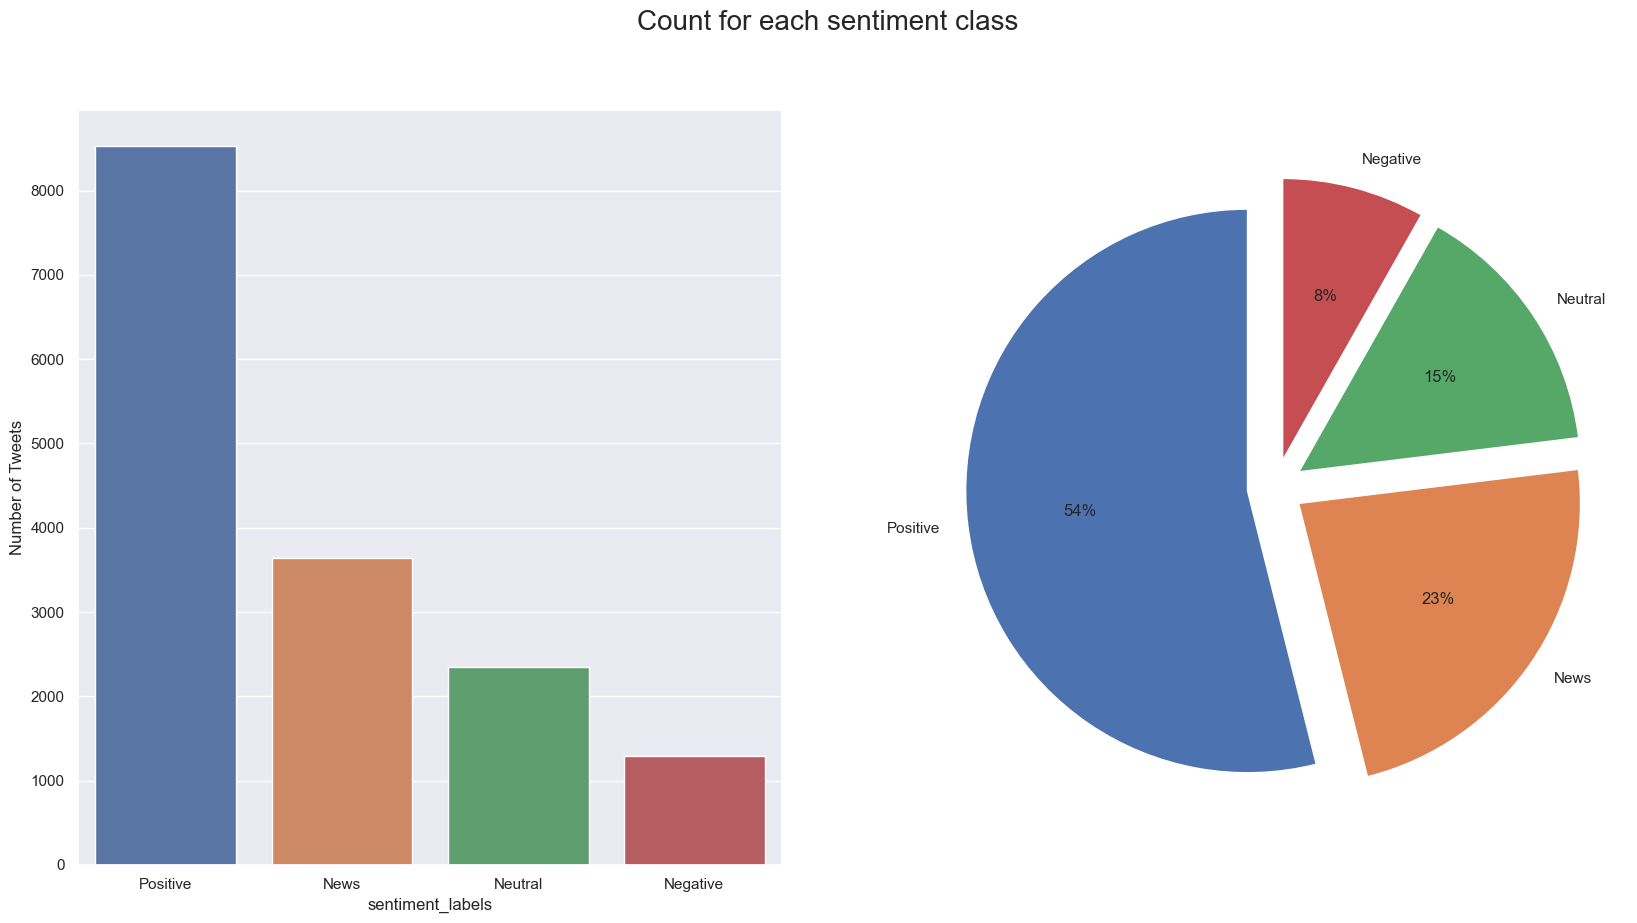

NameError: name 'News' is not defined

In [29]:
# exploring the distribution of the sentiments
train['sentiment_labels']  = df_train['sentiment'].map({-1:'Negative', 0:'Neutral', 1:'Positive', 2:'News'})

fig, axes = plt.subplots(ncols = 2, nrows = 1, figsize = (20, 10), dpi = 100)
sns.countplot(train['sentiment_labels'], ax = axes[0]).set_ylabel('Number of Tweets')

Sentiments_ = ['Positive', 'News', 'Neutral', 'Negative']
axes[1].pie(train['sentiment_labels'].value_counts(),
            labels = Sentiments_,
            autopct = '%1.0f%%',
            startangle = 90,
            explode = (0.1, 0.1, 0.1, 0.1))

fig.suptitle('Count for each sentiment class', fontsize=20)
plt.show()

print('No of Tweets labelled as News:',News)
print('No of Tweets labelled as Pro:',Pro)
print('No of Tweets labelled as Neutral:',Neutral)
print('No of Tweets labelled as Anti:',Anti)

print('Data is unbalanced with only',round(((News/(News+Pro+Neutral+Anti))*100),2),'% news tweets,',
      round(((Pro/(Pro+News+Neutral+Anti))*100),2),'% (pro)positive tweets,',round(((Neutral/(Neutral+Pro+News+Anti))*100),2),
      '% neutral tweets and',
      round(((Anti/(Anti+Neutral+News+Pro))*100),2),'% (anti)negative tweets')

The above shows that the positive tweets are more than the other categories combined, which shows that a larger number of people agree with climate change and that it is man-made. Now let's do a quick analysis of the distribution of observations across our labels.

Text(0, 0.5, 'Density')

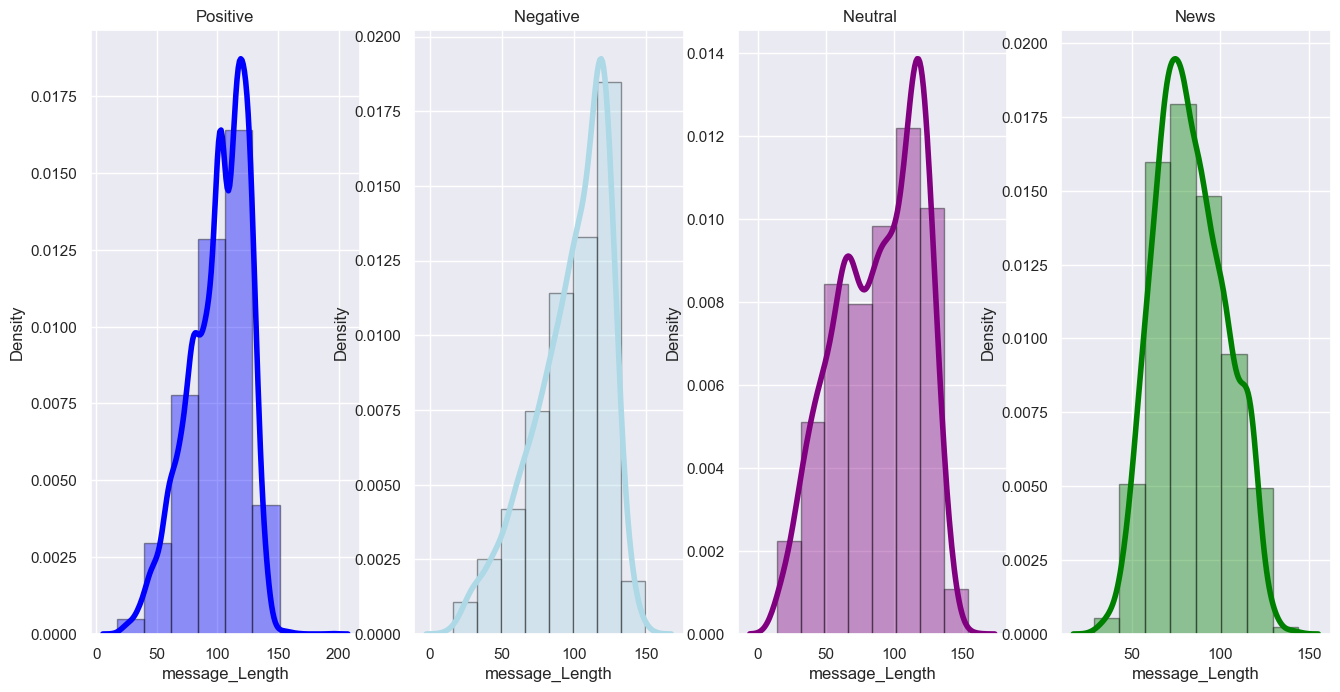

In [30]:
# Distribution plots for the labels
fig,(ax1,ax2,ax3,ax4) = plt.subplots(nrows = 1, ncols = 4, figsize = (16, 8), dpi = 100)

#For Positive 
sns.distplot(df_train[df_train['sentiment'] == 1]['message'].str.len(), hist=True, kde=True, bins = int(200/25),
             color = 'blue', ax = ax1, hist_kws = {'edgecolor':'black'}, kde_kws = {'linewidth': 4})
ax1.set_title('Positive')
ax1.set_xlabel('message_Length')
ax1.set_ylabel('Density')

#For Negative 
sns.distplot(df_train[df_train['sentiment'] == -1]['message'].str.len(), hist=True, kde=True, bins = int(200/25),
             color = 'lightblue', ax = ax2, hist_kws = {'edgecolor':'black'}, kde_kws = {'linewidth': 4})
ax2.set_title('Negative ')
ax2.set_xlabel('message_Length')
ax2.set_ylabel('Density')

#For Neutral 
sns.distplot(df_train[df_train['sentiment'] == 0]['message'].str.len(), hist=True, kde=True, bins = int(200/25),
             color = 'purple', ax = ax3, hist_kws = {'edgecolor':'black'}, kde_kws = {'linewidth': 4})
ax3.set_title('Neutral ')
ax3.set_xlabel('message_Length')
ax3.set_ylabel('Density')

#For News
sns.distplot(df_train[df_train['sentiment'] == 2]['message'].str.len(), hist=True, kde=True, bins=int(200/25),
             color = 'green', ax = ax4, hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})
ax4.set_title('News')
ax4.set_xlabel('message_Length')
ax4.set_ylabel('Density')

A density plot is a representation of the distribution of a numeric variable .Looking at the four density graphs(for positive,negative,neutral and news) above we realise that the graphs above are not normally distributed,this means that they are not symetrical about the center and tend to be slightly skewed .

Taking a closer look at the negative density plot ,we realise that it has a slightly higher density than the rest of the graphs.Therefore the density count is signifigant for anti-climate change

### 4.2 Message length

In [31]:
df_train['message_length'] = df_train['message'].apply(len)

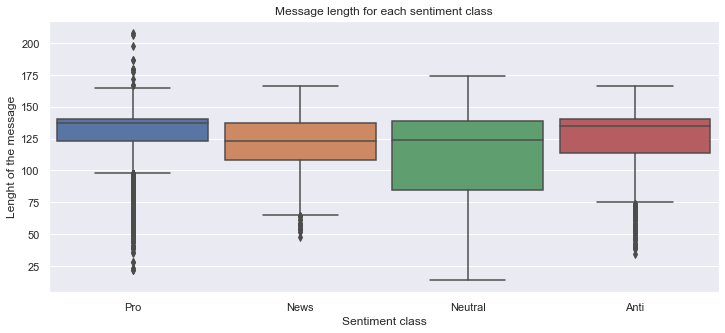

In [32]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 5

sns.boxplot(x=df_train['sent_labels'], y=df_train['text_length'], 
            data=train_eda, width = 0.9)#, color = ['pink', 'orange', 'yellow', 'green'])
plt.ylabel('Lenght of the message')
plt.xlabel('Sentiment class')
plt.title('Message length for each sentiment class')
plt.show()

The above is to confirm what we checked earlier, clearly pro tweets dominate in this case, creating a data imbalance.
* There is a strong imbalance for our sentiment classes

* Sentiment class '1' (Pro) leads the graph with almost 50% of the vote, while class '-1' (Anti) comes last with 8%.

* The length of the text is determined by the character limit of each Twitter tweet.The character limit used to be 140, however in late 2017, it was expanded to 280 characters.

* All classifications have obvious outliers, with the exception of 'neutral' sentiment, which includes all data.

* As evidenced by the longer messages in the outliers, the 'pro' class had a lot to say to express their opinion.

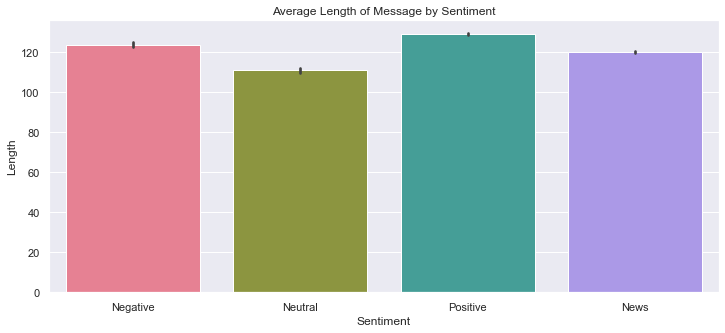

In [33]:
# Visualizing text lengths for each sentiment
labels = ['Negative', 'Neutral', 'Positive', 'News']
sns.barplot(x = 'sentiment', y = train['message'].apply(len), data = train, palette='husl').set_xticklabels(labels)
plt.ylabel('Length')
plt.xlabel('Sentiment')
plt.title('Average Length of Message by Sentiment')
plt.show()

Sentiment analysis is a technique that detects the underlying sentiment in a piece of text.It is the process of classifying text as either positive, negative, neutral or news.

Observing the bar graph above of average length of message by sentiment:
We observe that:
* the postive sentiment(pro-climate change ) has a significantly higher length above 120 
* the negative sentiment (anti-climate change) also has a high length of sligtly above 120
* the news sentiment (tweets posted by news) has a length of 120
* the neutral sentiment( tweets with neutral massege) has a length of slightly above 100 they don't write long tweets as conmpared to the rest

### 4.3 Hashtags for the sentiment classes

Hashtags are the most effective approach to link the conversions of comparable material on Twitter. Hashtags encourage social media users to look into information that they find interesting. Hashtags can be used by businesses to reach their target audience and to assist members in filtering content. As a result, we'll collect the majority of the hashtags for each sentiment class.

In [34]:
# Creating a column of hastags users
train['users'] = [''.join(re.findall(r'@\w{,}', sentence.lower())) 
                      if '@' in sentence else np.nan for sentence in train.message]

# Creating a column of hastags
hashtag_df = train.message.str.lower().str.findall(r'#.*?(?=\s|$)')
hashtag_df = hashtag_df.apply(lambda x: np.nan if len(x) == 0 else x).replace(np.nan, 0)
hashtag_df = pd.DataFrame(hashtag_df)
hashtag_df = hashtag_df[hashtag_df['message'] != 0]

In [35]:
hashtag = sum(hashtag_df['message'], [])
count = nltk.FreqDist(hashtag)  
hashtag = pd.DataFrame({'hashtags': list(count.keys()), 'count': list(count.values())})
hashtag = hashtag.nlargest(20, columns="count")
hashtag.head()

hashtags  count
18          #climate    344
23    #climatechange    188
21   #beforetheflood    154
51      #environment     73
143           #trump     70

A hashtag is a keyword or phrase preceded by the hash symbol (#), written within a post or comment to highlight it and facilitate a search for.Next we look at the five hashtag counts .we observe that #climate has a significantly high count(344) followed by #climatechange(188) which could imply that these are the most used hashtags to search.

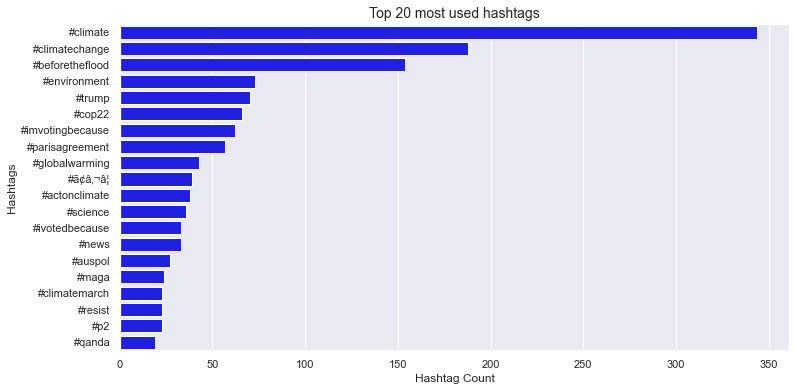

In [36]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data = hashtag.iloc[:20], y = 'hashtags', x = 'count', orient='h', color = 'blue')
plt.title("Top 20 most used hashtags", fontsize = 14)
plt.xlabel('Hashtag Count')
plt.ylabel('Hashtags')
plt.show()

* **#climate** and **#climatechange** are expected to be the most popular as they are our key identifier in tweets, **#environment** is also in the top 20.
* **#BeforeTheFlood** surfaced after a documentary about environmental degradation that leads to global warming and suggestions on how to reduce it, narrated by Leonardo DiCaprio.
* In 2016, **Donald Trump** made headlines across news publications after describing climate change as a **'Hoax'** while he was running for presidency for USA, reason why **#trump** is seen in the top hashtags
* The **#cop22**, COP22 (Conference of the Parties) represents the United Nations Climate Change Conference in 2016.

### 4.4 Exploring users

In [37]:
# Number of messages per users
users = train[['message', 'users']].groupby('users', as_index=False).count().sort_values(by='message', ascending = False)
users.head()

users  message
5876  @stephenschlegel      307
5618       @sensanders      243
5069  @realdonaldtrump      143
736     @berniesanders      121
1430              @cnn      106

Here we observe the first five number of message per user and @stephenschlegel has a significantly high message count of 307 this could be because stephen is the oerson that tweets the most while @sciam ,@fusion and @guardianeco have a very low cout and could potentially be outliers with the lowest popoular tags

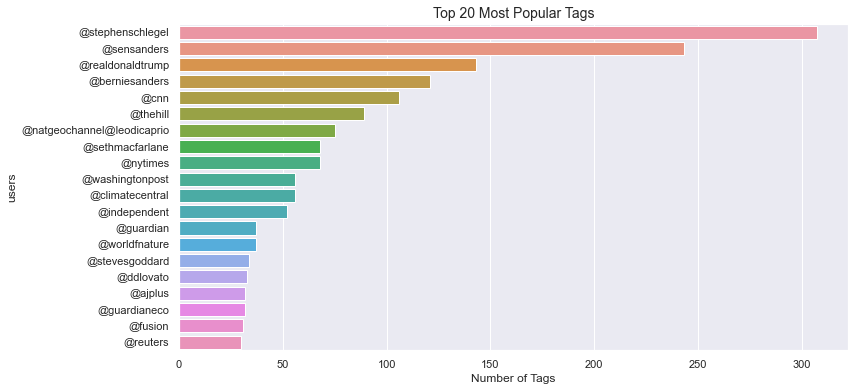

In [38]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data = train, y = 'users', order = train.users.value_counts().iloc[:20].index, orient='h')
plt.title('Top 20 Most Popular Tags', fontsize = 14)
plt.xlabel('Number of Tags')
plt.ylabel('users')
plt.show()

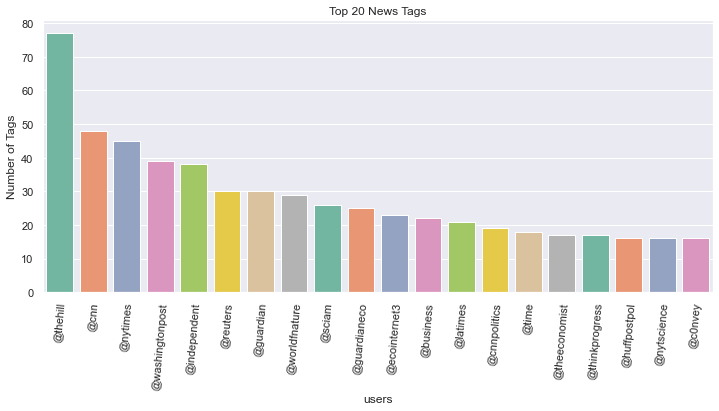

In [39]:
sns.countplot(x = "users", data = train[train['sentiment_labels'] == 'News'], palette='Set2',
              order=train[train['sentiment_labels'] == 'News'].users.value_counts().iloc[:20].index) 

plt.xlabel('users')
plt.ylabel('Number of Tags')
plt.title('Top 20 News Tags')
plt.xticks(rotation=85)
plt.show()

from bar graph above @thehill has the highest number of new tags

### 4.5 Clouds of words for different tweets

We would now like to know which words are mostly used by individuals in these groups. We first split our data into four different classes.

A word cloud is a textual data visualization which allows anyone to see in a single glance the words which have the highest frequency within a given body of text. Word clouds are typically used as a tool for processing, analyzing and disseminating qualitative sentiment data.

In [40]:
# Separate minority and majority classes
News = df_train[df_train['sentiment'] == 2]
Pro = df_train[df_train['sentiment'] == 1]
Neutral = df_train[df_train['sentiment'] == 0]
Anti = df_train[df_train['sentiment'] == -1]

#### Plot a cloud of words for anti-climate change tweets

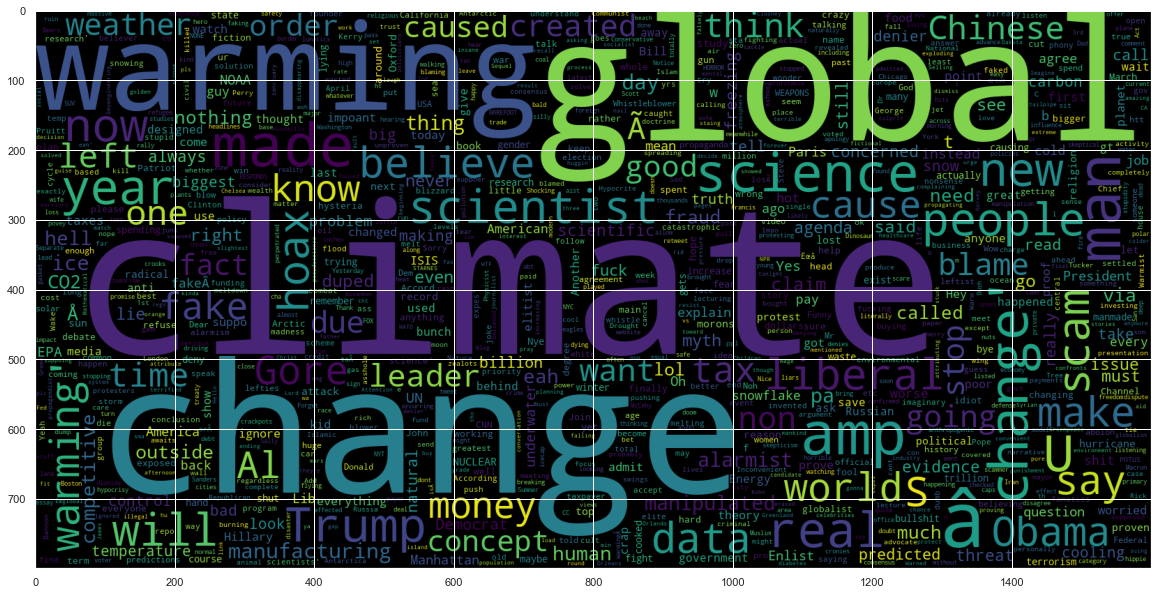

In [41]:
# word cloud
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800, collocations = False).generate(" ".join(Anti['message']))
plt.imshow(wc)

We see a lot of negative words such as fake, scam, hoax, manipulated, manmade, chinese ... etc. These are words which are mostly used by people who are against climate change. We can also see Donald Trump since he doesn't believe in climate change and he was vocal about his believes.

#### Plot a cloud of words for pro-climate change tweets

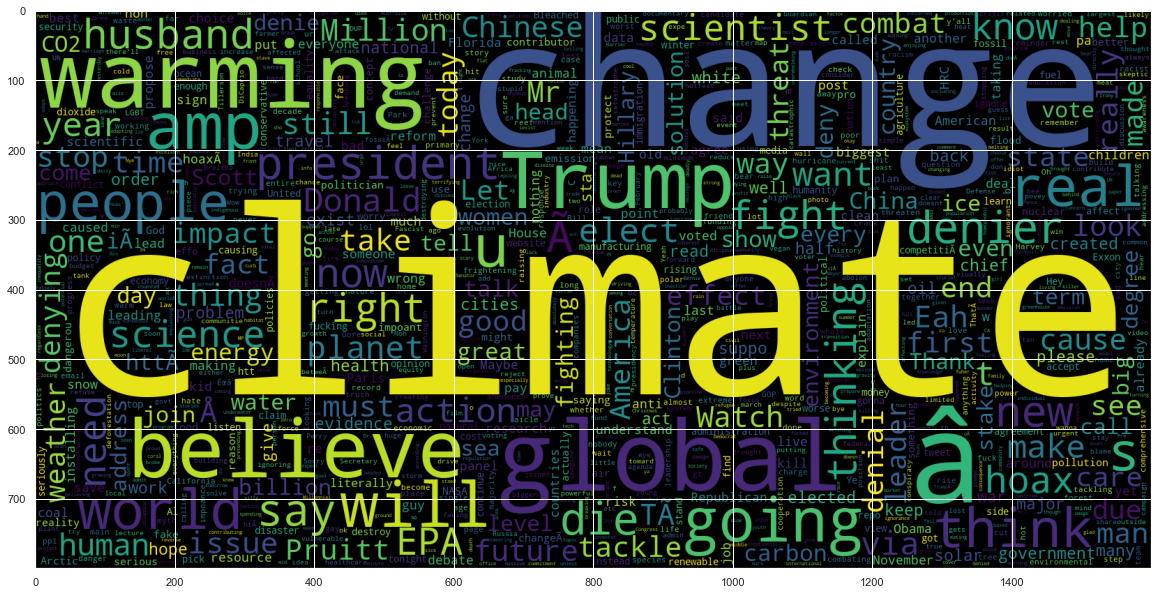

In [42]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800, collocations = False).generate(" ".join(Pro['message']))
plt.imshow(wc)

Here we see a lot of positive words, words that calls for help or action, words such as believe, action, real, think, environment, ... etc.

#### Plot a cloud of words for news networks tweets

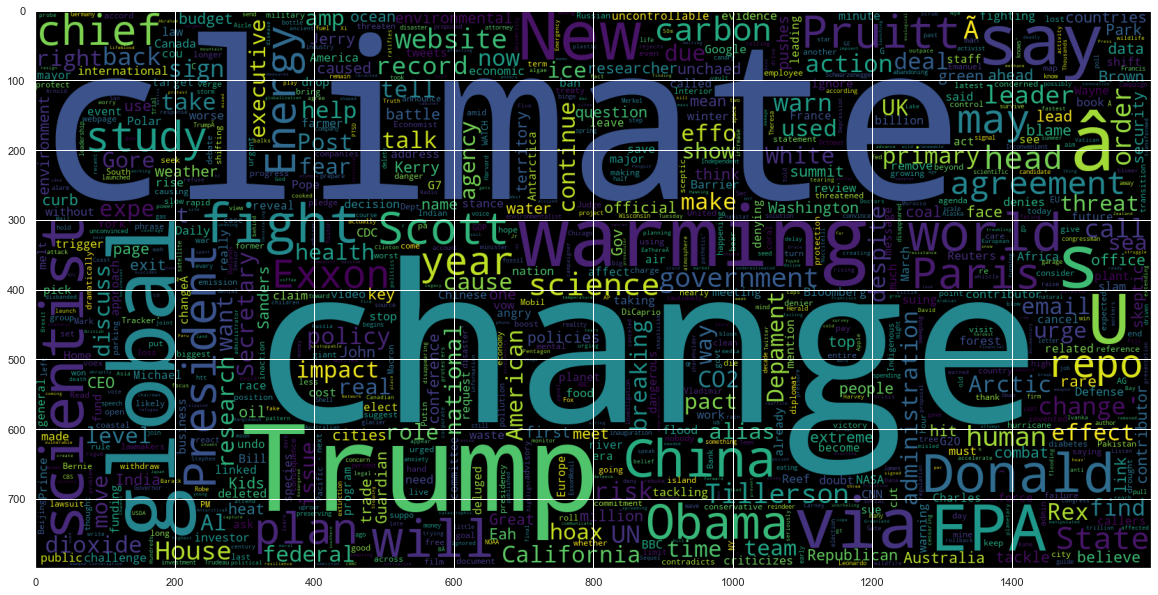

In [43]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800, collocations = False).generate(" ".join(News['message']))
plt.imshow(wc)

It looks like the news tweets are mostly retweets, we see words like climatechange, environment, change, climate, which is what we would expect considering the project is about climate change but we see words like research, washingtonpost, cnn,scientist, study, expert, policies which are unique to the news tweets.

##### Plot a cloud of words for neutral tweets

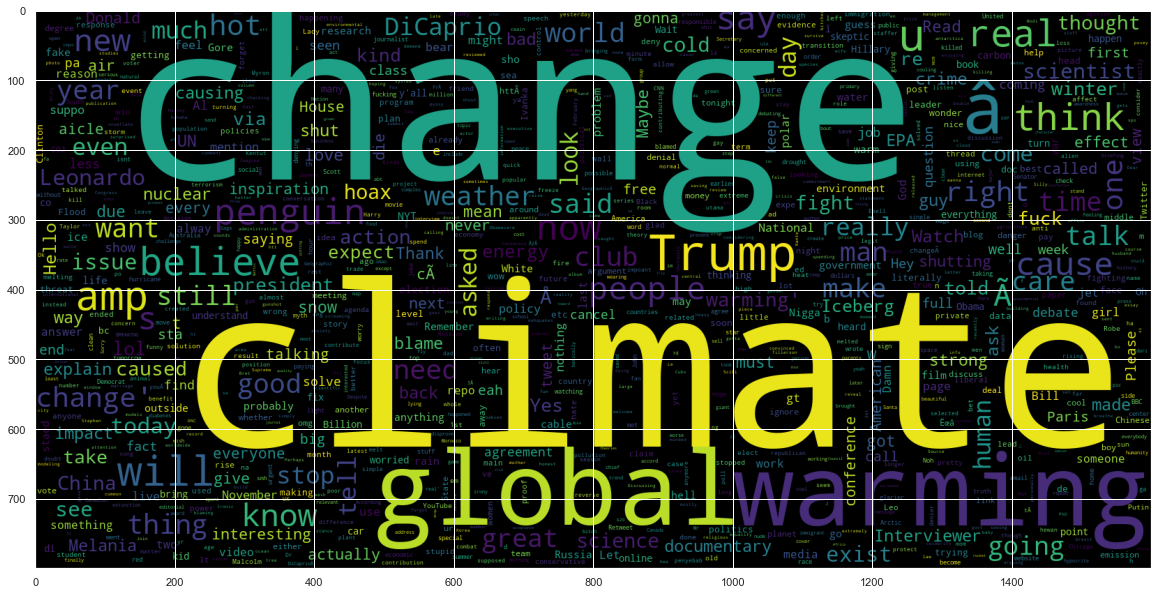

In [44]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800, collocations = False).generate(" ".join(Neutral['message']))
plt.imshow(wc)

Here we see words like such as penguin, people, global which are classified as neutral sentiment tweets. and we see words like retweet which suggest that also most of the tweets are retweets. the neutral tweets, they normally tweet about anything

<a id="five"></a>
## 5. Model Building
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

**We're going to look at the following models:**
*  Decision Tree Classifier
*  RandomForest Classifier
*  LinearSVC(Support Vector Classifier)
*  Support Vector Classifier
*  Logistic Regression
*  Stochastic Gradient Descent (SGD)
*  Ridge Classiffier
* XGB Classifier

### Decision Tree Classifier

Decision tree classifier is a machine learning algorithm, solving the problems of machine learning by transforming the data into a tree representation. A design tree classifier can be used to solve both regression and classification problems.

**Advantages:** 
+ Easy to interpret the decision rules.
+ Nonparametric, so it is easy to incorporate a range of numeric or categorical data layers and there is no need to select unimodal training data.
+ Robust with regard to outliers in training data

**Disadvantages:**
+ Decision trees tend to overfit training data which can give poor results when applied to the full data set
+ Not possible to predict beyond the minimum and maximum limits of the response variable in the training data.

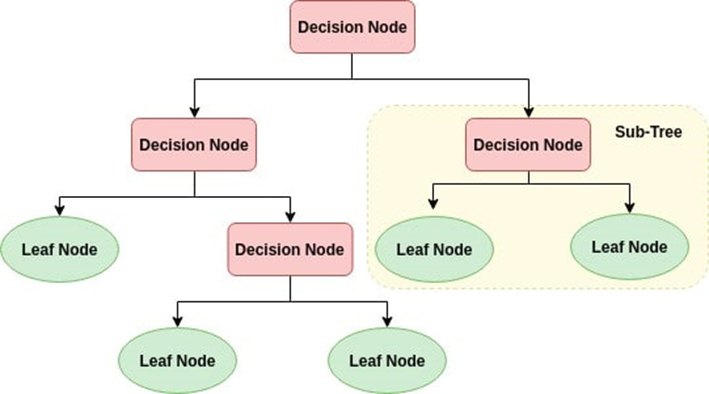

### Random Forest Classifier

Random forest classifier is an ensemble method used for classification; they are used to rank the importance of variables in a classification problem.

**Advantages:**

+ It provides accurate predictions for many types of applications
+ it can measure the importance of each feature with respect to the training data set.
+ Pairwise proximity between samples can be measured by the training data set.

**Disadvantages:**
+ For data including categorical variables with different number of levels, random forests are biased in favour those attributes with more levels.
+ If the data contain group of correlated features of similar relevance for the output, then smaller groups are favoured over larger groups.

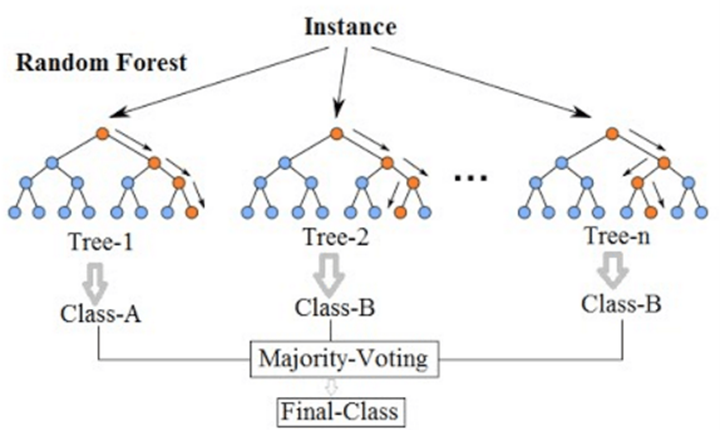

### Support Vector Classifier

A support vector machine (SVM) is machine learning algorithm that analyzes data for classification and regression analysis. SVM is a supervised learning method that looks at data and sorts it into one of two categories

**Advantages:**

+ SVMs gain flexibility in the choice of the form of the threshold separating solvent from insolvent companies, which needs not be linear and even needs not have the same functional form for all data, since its function is non-parametric and operates locally.
+ They can work with financial ratios, which show a non-monotone relation to the score and to the probability of default, or which are non-linearly dependent, and this without needing any specific work on each non-monotone variable.
+ Since the kernel implicitly contains a non-linear transformation, no assumptions about the functional form of the transformation, which makes data linearly separable, is necessary.
+ the transformation occurs implicitly on a robust theoretical basis and human expertise judgement beforehand is not needed.
+ SVMs provide a good out-of-sample generalization, SVMs can be robust, even when the training sample has some bias.

**Disadvantages:**

+ SVMs lack of transparency of result.
+ SVMs cannot represent the score of all companies as a simple parametric function of the financial ratios since its dimension may be very high.
+ The weights of the financial ratios are not constant. Thus, the marginal contribution of each financial ratio to the score is variable.

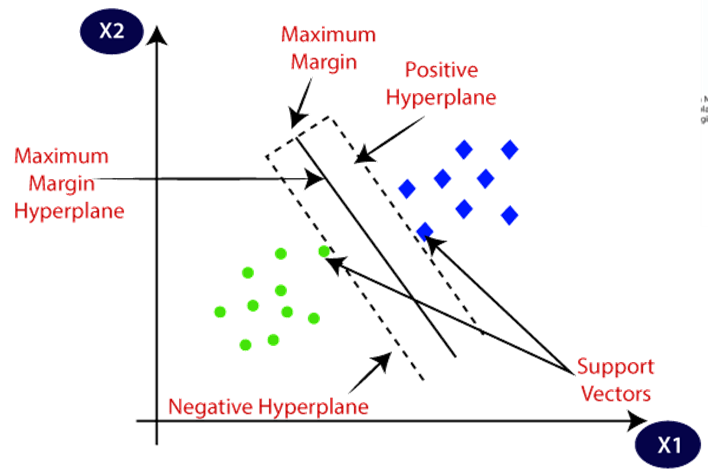

### Linear Support Vector Classifier

SVM or Support Vector Machine is a linear model for classification and regression problems. It can solve linear and non-linear problems and work well for many practical problems. The idea of SVM is simple: The algorithm creates a line or a hyperplane which separates the data into classes as seen in the diagram below
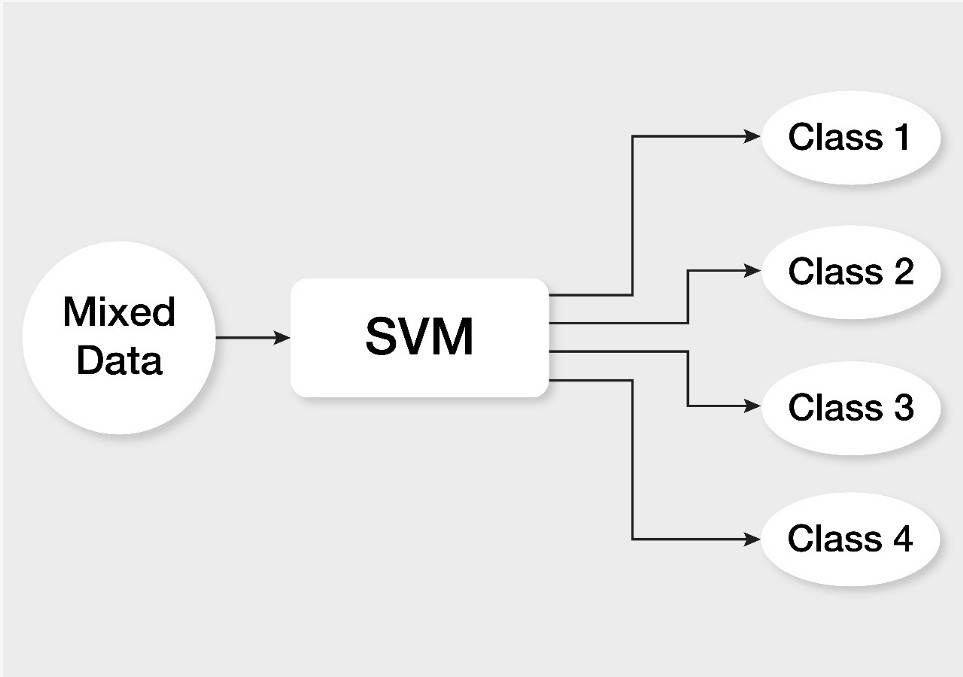

To better explain the concept of SVM we will look at a case of two classes.

To find the best line seperating the classes

The SVM algorithm finds the points closest to the line from both the classes.These points are called support vectors, then it compute the distance between the line and the support vectors, This distance is called the margin. Our goal is to maximize the margin.

In a case for more than two classes the goal is to find the the best hyperplane that seperates the classes. The hyperplane for which the margin is maximum is the optimal hyperplane.

Below is a visual representation of how SVMs work
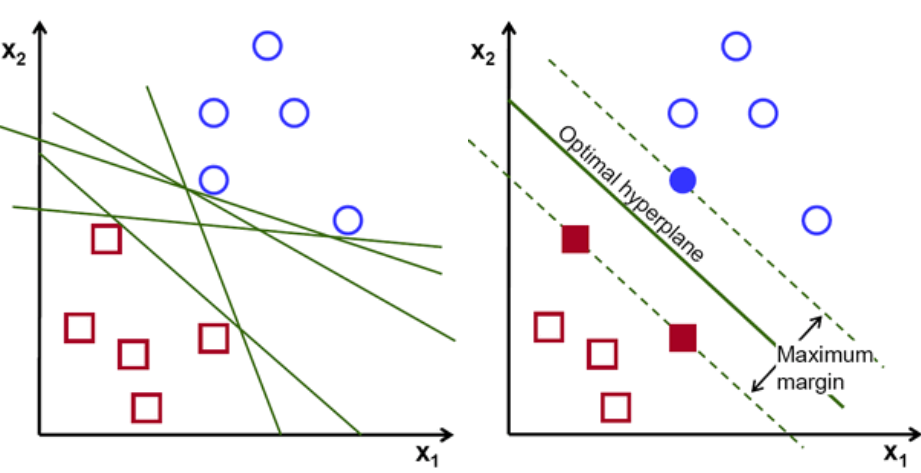

We wil be looking at two Support Vector Classifer models namely SVC and LinearSVC, the main differences between these two are as follows

+ By default scaling, LinearSVC minimizes the squared hinge loss while SVC minimizes the regular hinge loss.
+ LinearSVC uses the One-vs-All (also known as One-vs-Rest) multiclass reduction while SVCuses the One-vs-One multiclass reduction.

### Logistic regression 
Logistic regression is Logistic Regression is a Machine Learning classification algorithm which is used for the classification problems, it is a predictive analysis algorithm and based on the concept of probability (Ayush Pant, 2019).

**Advantages:**
+ is advantageous in that you can use continuous explanatory variables when working with it and it is easier to handle more than two explanatory variables simultaneously.
+ Logistic regression is easier to implement, interpret, and very efficient to train.
+ It makes no assumptions about distributions of classes in feature space.
+ It can easily extend to multiple classes (multinomial regression) and a natural probabilistic view of class predictions
+ Good accuracy for many simple data sets and it performs well when the dataset is linearly separable.
+ It can interpret model coefficients as indicators of feature importance.
+ Logistic regression is less inclined to over-fitting but it can be overfit in high dimensional datasets.

**Disadvantages:**
+ The major limitation of Logistic Regression is the assumption of linearity between the dependent variable and the independent variables.
+ It can only be used to predict discrete functions. Hence, the dependent variable of Logistic Regression is bound to the discrete number set.
+ Logistic Regression requires average or no multicollinearity between independent variables.
+ It is tough to obtain complex relationships using logistic regression. More powerful and compact algorithms such as Neural Networks can easily outperform this algorithm.

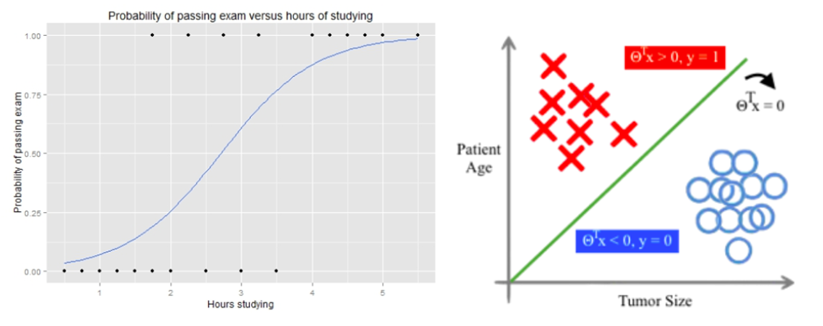

### Stochastic Gradient Descent

Stochastic gradient descent is a method to find the optimal parameter configuration for a machine learning algorithm. It iteratively makes small adjustments to a machine learning network configuration to decrease the error of the network.

**Advantages**

+ It is easier to fit in the memory due to a single training example being processed by the network.
+ It is computationally fast as only one sample is processed at a time.
+ For larger datasets, it can converge faster as it causes updates to the parameters more frequently.
+ Due to frequent updates, the steps taken towards the minima of the loss function have oscillations that can help to get out of the local minimums of the loss function (in case the computed position turns out to be the local minimum).

**Disadvantages**

+ Due to frequent updates, the steps taken towards the minima are very noisy. This can often lean the gradient descent into other directions.
+ Also, due to noisy steps, it may take longer to achieve convergence to the minima of the loss function.
+ Frequent updates are computationally expensive because of using all resources for processing one training sample at a time.
+ It loses the advantage of vectorized operations as it deals with only a single example at a time.

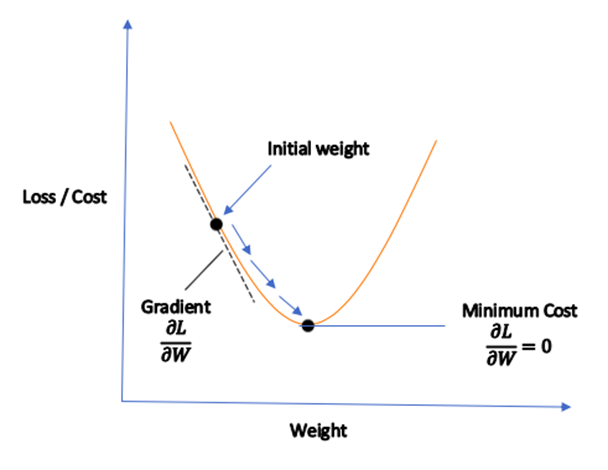

### Ridge classifier

The Ridge Classifier, based on Ridge regression method, converts the label data into [-1, 1] and solves the problem with regression method. The highest value in prediction is accepted as a target class and for multiclass data multi-output regression is applied.

**Advantages**

- Avoids overfitting a model.
- They do not require unbiased estimators.
- They add just enough bias to make the estimates reasonably reliable approximations to true population values.
- They still perform well in cases of a large multivariate data with the number of predictors § larger than the number of observations (n).
- The ridge estimator is preferably good at improving the least-squares estimate when there is multicollinearity.

**Disadvantages**

- They include all the predictors in the final model.
- They are unable to perform feature selection.
- They shrink the coefficients towards zero.
- They trade the variance for bias.

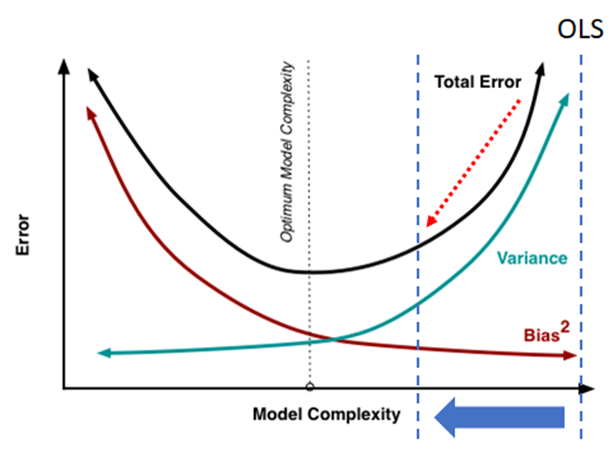

### XGB Classifier

XGBoost stands for “Extreme Gradient Boosting”. XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements Machine Learning algorithms under the Gradient Boosting framework. It provides a parallel tree boosting to solve many data science problems in a fast and accurate way. 

**Advantages:**

+ XGBoost can in parallel do classification on multiple operating systems (Zygmunt, 2016) and by setting the parameters the desired decision tree algorithm can be run on XGBoost, that is, XGBoost can be the desired algorithm plus the boosting applied to it.
+ XGBoost compared to traditional Boosted models increases the speed up to 10 times and hence, the classification model becomes better as in a network model speed plays an important role (Zygmunt, 2016).
+ XGBoost is quite flexible as it does not depend on the type of data entering a network, it can easily convert the entering data into numeric type and from there can classify data at good speed and accuracy. 
+ The overfitting and other problems related to other classification methods are easily dealt by XGBoost. The catch in the model is that the parameters set in the XGBoost model play an important role in defining the way the classification model brings about the result.

**Disadvantages:**

- Difficult interpretation, visualization tough
- Overfitting possible if parameters not tuned properly.
- Harder to tune as there are too many hyperparameters. 

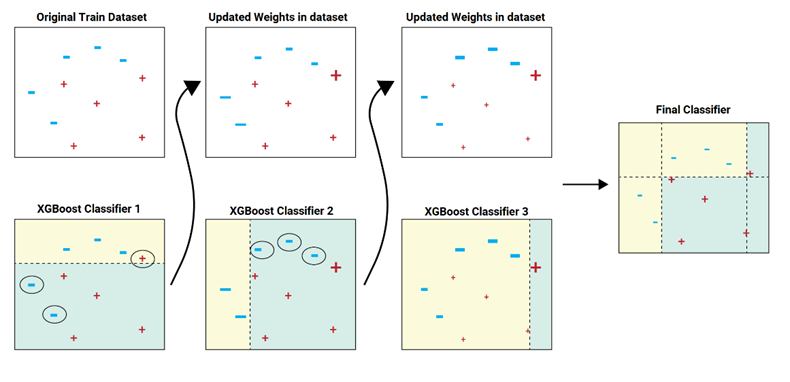

### 5.1 Feature Engineering

Term Frequency — Inverse Document Frequency (TF-IDF) is a statistic that attempts to better identify the importance of a word in a document while also considering its relationship to other documents in the same corpus. This is done by counting the number of times a term appears in a document as well as the number of times the same word appears in other documents in the corpus. Each unique token gets a feature index, and vocabulary_ is a dictionary that translates each word in the text to a feature index in the matrix.

The CountVectorizer is a simple way to tokenize a collection of text documents and build a vocabulary of known words, as well as encode new documents using that vocabulary, by creating a matrix in which each unique word is represented by a column of the matrix and each text sample from the document is represented by a row in the matrix.

In [45]:
# Data preprocessing for model building

df_train = train.copy()
df_test = test.copy()
normalizer = WordNetLemmatizer()
nltk.download('wordnet')

def replace_sentiments(df):
    """
    replace keywords in the tweets  with associated sentiments
    
    'global' ----> 'negative'
    'climate' ----> 'positive'
    'MAGA'----> 'negative'
  
    """
    df['message'] = df['message'].apply(lambda x: x.replace('global', 'negative'))
    df['message'] = df['message'].apply(lambda x: x.replace('climate', 'positive'))
    df['message'] = df['message'].apply(lambda x: x.replace('MAGA', 'negative')) 

    return df['message']

df_train['message'] = replace_sentiments(df_train)
df_test['message'] = replace_sentiments(df_test)

# cleaning tweets
df_train['clean_tweets'] = clean_tweets(df_train)
df_test['clean_tweets'] = clean_tweets(df_test)


# lemmatize
df_train['clean_tweets'] = df_train['clean_tweets'].apply(lambda x: [normalizer.lemmatize(token, POS(token)) for token in x])
df_test['clean_tweets'] = df_test['clean_tweets'].apply(lambda x: [normalizer.lemmatize(token, POS(token)) for token in x])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Bohlale\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### 5.2 Metrics creation

In [46]:
X = df_train['clean_tweets']
y = df_train['sentiment']
X_test = df_test['clean_tweets']

### 5.3 Splitting the data

We are going to split the data into 80% train and 20% validation(test).The primary objective of dividing the dataset into a validation set is to avoid overfitting (which occurs when a model gets extremely good at categorizing samples in the training set but is unable to generalize and make accurate classifications on data it has never seen before).

In [47]:
# Splitting the data into 80% train and 20% validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state = 42)

In [48]:
X_train = list(X_train.apply(' '.join))
X_val = list(X_val.apply(' '.join))
X_test = list(X_test.apply(' '.join))

### 5.4 Building classification pipelines

A pipeline is a tool that applies a list of transforms and a final estimator in a sequential manner. The pipeline's intermediate steps implement fit and transform techniques, whereas the final estimator simply has to implement fit. Pipelines will assist us in transforming the train, validation, and test data, as well as training our models, in our instance.

Seeing as our models can only process numerical data, the first step is to create a pipeline that converts text data to numeric data. In this notebook, we'll focus on two feature engineering methods that we'll use to convert text data to numeric data, namely TfidfVectorizer and CountVectorizer, and then we'll train our models using these pipelines.

We will build pipelines using both approaches and examine which technique has the greatest accuracy on averagetfidfVectorizer and the CountVectorizer in order to decide which feature extraction method we will utilize for the remainder of the notebook between the TF-IDF and the CountVectorizer.

In [49]:
# DecisionTreeClassifier Pipeline
tree_tfidf = Pipeline([('tfidf', TfidfVectorizer()),('tree', DecisionTreeClassifier()),])
tree_count = Pipeline([('CountVec',  CountVectorizer(analyzer = 'word', 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 180000,
                             min_df = 1,
                             ngram_range = (1,2)
                            )),('tree', DecisionTreeClassifier()),])


# RandomForestClassifier Pipeline
rfc_tfidf = Pipeline([('tfidf', TfidfVectorizer()), ('rfc', RandomForestClassifier())])
rfc_count = Pipeline([('CountVec',  CountVectorizer(analyzer = 'word', 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 180000,
                             min_df = 1,
                             ngram_range = (1,2)
                            )),('rfc', RandomForestClassifier()),])


# LinearSVC Pipeline
Lsvc_tfidf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('scv', LinearSVC()),])
Lsvc_count = Pipeline([('CountVec',  CountVectorizer(analyzer = 'word', 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 180000,
                             min_df = 1,
                             ngram_range = (1,2)
                            )),('svc', LinearSVC()),])



# Logistic Regression pipeline
logreg_tfidf = Pipeline([('tfidf', TfidfVectorizer()),('logistic', LogisticRegression()),])
logreg_count = Pipeline([('CountVec',  CountVectorizer(analyzer = 'word', 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 180000,
                             min_df = 1,
                             ngram_range = (1,2)
                            )),('logistic', LogisticRegression()),])

#XGB Classifier pipeline
xgb_tfidf = Pipeline([('tfidf', TfidfVectorizer()), ('xgb', XGBClassifier())])
xgb_count = Pipeline([('CountVec', CountVectorizer(analyzer = 'word',
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 180000,
                             min_df = 1,
                             ngram_range = (1,2)
                            )),('xgb', XGBClassifier()),])



# SGD Classifier pipeline
SGD_tfidf = Pipeline([('tfidf', TfidfVectorizer()), ('SGD', SGDClassifier())])
SGD_count = Pipeline([('CountVec',  CountVectorizer(analyzer = 'word', 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 180000,
                             min_df = 1,
                             ngram_range = (1,2)
                            )),('SGD', SGDClassifier()),])




# Support Vector Classifier Pipeline
svc_tfidf = Pipeline([('tfidf', TfidfVectorizer()), ('SVC', SVC())])
svc_count = Pipeline([('CountVec',  CountVectorizer(analyzer = 'word', 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 180000,
                             min_df = 1,
                             ngram_range = (1,2)
                            )),('SVC', SVC()),])


ridge_tfidf = Pipeline([('tfidf', TfidfVectorizer()), ('Ridge', RidgeClassifier())])
ridge_count = Pipeline([('CountVec',  CountVectorizer(analyzer = 'word', 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 180000,
                             min_df = 1,
                             ngram_range = (1,2)
                            )),('Ridge', RidgeClassifier()),])

### 5.5 Training the models

In [52]:
# training the decision tree pipeline
tree_tfidf.fit(X_train, y_train)
tree_count.fit(X_train, y_train)

# training the RandomForest pipleline
rfc_tfidf.fit(X_train, y_train)
rfc_count.fit(X_train, y_train)

# training the LinearSVC pipeline
Lsvc_tfidf.fit(X_train, y_train)
Lsvc_count.fit(X_train, y_train)

# training the logistic regression pipeline
logreg_tfidf.fit(X_train, y_train)
logreg_count.fit(X_train, y_train)

#training the XGBoost pipeline
xgb_tfidf.fit(X_train, y_train)
xgb_count.fit(X_train, y_train)

# training the SGD pipeline
SGD_tfidf.fit(X_train, y_train)
SGD_count.fit(X_train, y_train)

# training the support vector pipeline
svc_tfidf.fit(X_train, y_train)
svc_count.fit(X_train, y_train)

# training the Ridge pipeline
ridge_tfidf.fit(X_train, y_train)
ridge_count.fit(X_train, y_train)

Pipeline(steps=[('CountVec',
                 CountVectorizer(max_features=180000, ngram_range=(1, 2))),
                ('Ridge', RidgeClassifier())])

In [53]:
# calculating average scores for the TFIDF
tree_acc =  accuracy_score(y_val,tree_tfidf.predict(X_val))
rfc_acc = accuracy_score(y_val,rfc_tfidf.predict(X_val))
lsvc_acc = accuracy_score(y_val,Lsvc_tfidf.predict(X_val))
log_acc = accuracy_score(y_val, logreg_tfidf.predict(X_val))
xgb_acc = accuracy_score(y_val, xgb_tfidf.predict(X_val))
sgd_acc = accuracy_score(y_val, SGD_tfidf.predict(X_val))
svc_acc = accuracy_score(y_val, svc_tfidf.predict(X_val))
ridge_acc = accuracy_score(y_val, ridge_tfidf.predict(X_val))

tfidf_avg_accuracy = round(np.mean([tree_acc,rfc_acc,lsvc_acc,log_acc,sgd_acc,svc_acc,ridge_acc]),4)

In [54]:
tree_acc =  accuracy_score(y_val,tree_count.predict(X_val))
rfc_acc = accuracy_score(y_val,rfc_count.predict(X_val))
lsvc_acc = accuracy_score(y_val,Lsvc_count.predict(X_val))
log_acc = accuracy_score(y_val, logreg_count.predict(X_val))
xgb_acc = accuracy_score(y_val, xgb_count.predict(X_val))
sgd_acc = accuracy_score(y_val, SGD_count.predict(X_val))
svc_acc = accuracy_score(y_val, svc_count.predict(X_val))
ridge_acc = accuracy_score(y_val, ridge_count.predict(X_val))

CountVec = round(np.mean([tree_acc,rfc_acc,lsvc_acc,log_acc,sgd_acc,svc_acc, ridge_acc]),4)

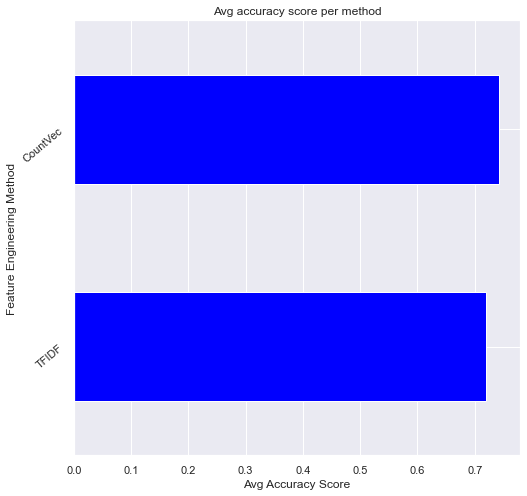

In [57]:
accuracy_dict = {'TFIDF':[tfidf_avg_accuracy], 'CountVec':[CountVec]}
accuracy_df = pd.DataFrame(accuracy_dict)
accuracy_df.T.plot(kind='barh', figsize = (8,8),legend = False, color = 'blue')
plt.xlabel('Avg Accuracy Score')
plt.ylabel('Feature Engineering Method')
plt.yticks(rotation = 40)
plt.title('Avg accuracy score per method')
plt.show()

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

The Classification Report gives us more information on where our model is going wrong - in our case, we will look at F1 score as that is the main indicator in our submission. The following metrics are calculated as part of the classification report. Furthermore, F1 Score might be a better measure to use if we need to seek a balance between Precision and Recall and there is an uneven class distribution

#### Precision

Precision is describes how often the the positive prediction is correctly made.

$$ Precision = \frac{TP}{TP \space + FP} = \frac{TP}{Total \space Predicted \space Positive} $$

#### Recall

The recall finds all the positive samples and deduces how often the predicted outcome comes out positive.

$$ Recall = \frac{TP}{TP \space + FN} = \frac{TP}{Total \space Actual \space Positive}$$

#### F1 Score

Weighted average of precision and recall. 

$$F_1 = 2 \times \frac {Precision \space \times \space Recall }{Precision \space + \space Recall }$$

Making predictions for the validation sets will help in evaluating our models (refer to the code below)

In [58]:
# Making validations set predicions

tree_prediction = tree_count.predict(X_val) # DecisionTreeClassifier predictions
rfc_prediction = rfc_count.predict(X_val) # RandomForestClassifier predictions
Lsvc_prediction = Lsvc_count.predict(X_val) # LinearSVClassifier Predictions
logreg_prediction = logreg_count.predict(X_val) # Logistic regression predictions
xgb_prediction = xgb_count.predict(X_val) #xgb Classifier predictions
SGD_prediction = SGD_count.predict(X_val) # SGD Classifier predictions
SVC_prediction = svc_count.predict(X_val) # Support vector machine predictions
ridge_prediction = ridge_count.predict(X_val) # Ridge predictions

## 6.1 `Model Evaluation`

### Decision tree classifier


Decision Tree
 [[  84   54  122   18]
 [  28  165  199   33]
 [  36  154 1331  234]
 [   4   26  171  505]]



Decision Tree
               precision    recall  f1-score   support

          -1       0.55      0.30      0.39       278
           0       0.41      0.39      0.40       425
           1       0.73      0.76      0.74      1755
           2       0.64      0.72      0.68       706

    accuracy                           0.66      3164
   macro avg       0.58      0.54      0.55      3164
weighted avg       0.65      0.66      0.65      3164



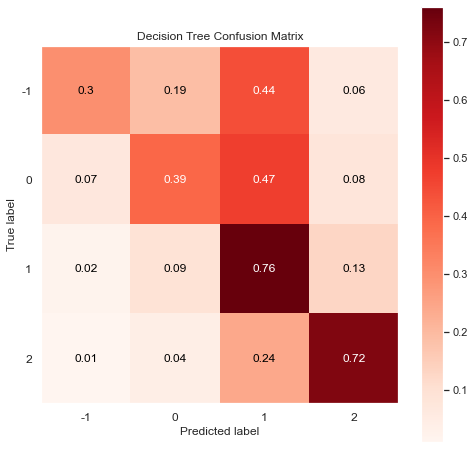

In [59]:
print('\nDecision Tree\n', confusion_matrix(y_val, tree_prediction))
print()
print()
print('\nDecision Tree\n',classification_report(y_val, tree_prediction))
plot_confusion_matrix(y_val, tree_prediction, normalize=True,figsize=(8,8),cmap='Reds')
plt.title('Decision Tree Confusion Matrix')
plt.show()

The heatmap of the confusion matrix demonstrates the model's ability to categorize positive samples, with each class having a recall score of:

+ Anti Climate Change : 0.31
+ Neutral : 0.38
+ Pro : 0.75
+ News : 0.72

We can see that the majority of tweets are mistakenly classified as pro sentiment classes, with 41% and 48% of anti and neutral sentiment classes being incorrectly classified as pro sentiment classes, respectively.

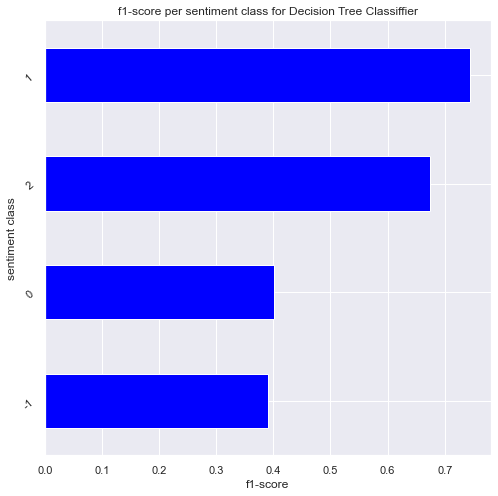


Overall accuracy score for Decision Tree : 0.659

Weighted avg f1 score Decision Tree 0.6514


In [82]:
# # Visual represetation of of the f1 score for each class
report_tree = classification_report(y_val, tree_prediction, output_dict=True)
df_tree = pd.DataFrame(report_tree).transpose()
df_tree.drop(['accuracy'], inplace = True)
df_tree.sort_values(by=['f1-score'],ascending=True, inplace = True)


df_tree.drop(['weighted avg','macro avg'])['f1-score'].plot(kind='barh', figsize = (8,8), stacked=False, color='Blue')
plt.xlabel('f1-score')
plt.ylabel('sentiment class')
plt.yticks(rotation = 40)
plt.title('f1-score per sentiment class for Decision Tree Classiffier')
plt.show()

# Print the overall accuracy
decison_tree_acc = round(accuracy_score(y_val, tree_prediction),4)
print(f'\nOverall accuracy score for Decision Tree : {decison_tree_acc}')
decision_tree_f1 = round(f1_score(y_val, tree_prediction, average="weighted"),4)
print(f'\nWeighted avg f1 score Decision Tree {decision_tree_f1}' )

The figure above shows the F1 score of each sentiment class for the classifier -Decision Tree. Our observations indicate that the model did well in classifying the positive tweets, while in contrast doing very bad with the negative tweets. This is expected due to the imbalance of data that was depicted in our train data earlier on.

In addition, it can be observed that the model did not perform that well in classifying the tweet sentiments.This can be seen with an accuracy score of approximately 0.66 and F1 score of approximately 0.65.

**`NB!` all the `overall accuracy scores` and `weighted avg f1 scores` will be approximated across all model during our evaluation.**

### Random forest classifier


RandomForestClassifier
 [[  48   28  195    7]
 [   3  137  269   16]
 [   1   39 1592  123]
 [   1   11  195  499]]



RandomForestClassifier
               precision    recall  f1-score   support

          -1       0.91      0.17      0.29       278
           0       0.64      0.32      0.43       425
           1       0.71      0.91      0.79      1755
           2       0.77      0.71      0.74       706

    accuracy                           0.72      3164
   macro avg       0.76      0.53      0.56      3164
weighted avg       0.73      0.72      0.69      3164



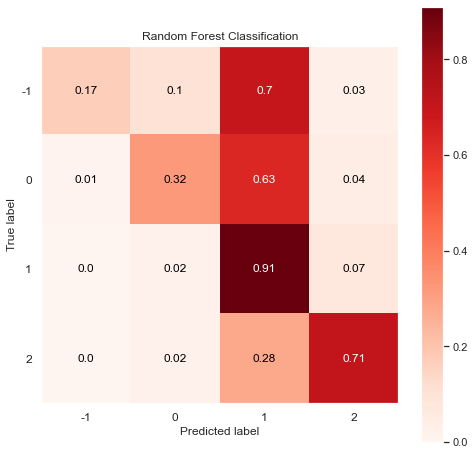

In [83]:
print('\nRandomForestClassifier\n', confusion_matrix(y_val, rfc_prediction))
print()
print()
print('\nRandomForestClassifier\n', classification_report(y_val, rfc_prediction))
plot_confusion_matrix(y_val, rfc_prediction, normalize=True,figsize=(8,8),cmap='Reds')
plt.title('Random Forest Classification')
plt.show()

The heatmap of the confusion matrix demonstrates the model's ability to categorize positive samples, with each class having a recall score of:

+ Anti Climate Change : 0.17
+ Neutral : 0.27
+ Pro : 0.92
+ News : 0.70

Although Random Forest classifier did very well in classifying the positive tweets, it performed badly as it incorrectly classified the sentiment classes `anti` and `neutral` with `positive` sentiment class 72% and 68% of the time, respectively.

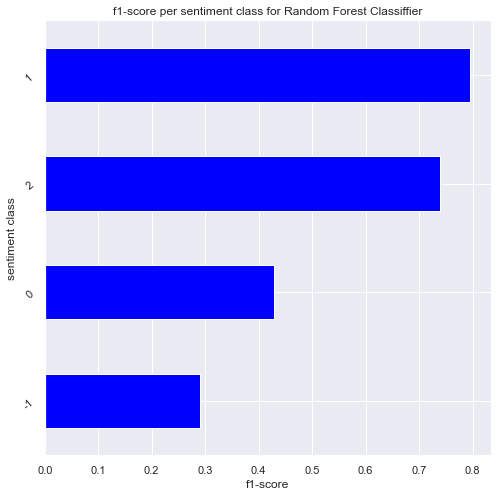


Overal accuracy score for RandomForestClassifier :0.7193

Weighted f1 score for RandomForestClassifier : 0.6887


In [84]:
# # Visual represetation of of the f1 score for each class
report_rfc = classification_report(y_val, rfc_prediction, output_dict=True)
df_rfc = pd.DataFrame(report_rfc).transpose()
df_rfc.drop(['accuracy'], inplace = True)
df_rfc.sort_values(by=['f1-score'],ascending=True, inplace = True)
df_rfc.drop(['weighted avg','macro avg'])['f1-score'].plot(kind='barh', figsize = (8,8), color = 'blue')
plt.xlabel('f1-score')
plt.ylabel('sentiment class')
plt.yticks(rotation = 40)
plt.title('f1-score per sentiment class for Random Forest Classiffier')
plt.show()

random_forest_acc = round(accuracy_score(y_val, rfc_prediction),4)
print(f'\nOveral accuracy score for RandomForestClassifier :{random_forest_acc}')
random_forest_f1 = round(f1_score(y_val, rfc_prediction, average="weighted"),4)
print(f'\nWeighted f1 score for RandomForestClassifier : {random_forest_f1}')

The figure above shows the F1 score of each sentiment class for the classifier -Random Forest. Random Forest has performed better than Decision tree in classifying the pro and news sentiments. However, the classifier still did not perform well with the nuetral and Anti sentiments, because the f1 scores are below 0.4 for both. In addition, the accuracy score of 0.72 and f1 score of 0.68 shows that Random Forest is the best model thus far.

### LinearSVC


LinearSVC Model
 [[ 134   49   86    9]
 [  15  216  166   28]
 [  19   90 1521  125]
 [   3   15  110  578]]



LinearSVC Model
               precision    recall  f1-score   support

          -1       0.78      0.48      0.60       278
           0       0.58      0.51      0.54       425
           1       0.81      0.87      0.84      1755
           2       0.78      0.82      0.80       706

    accuracy                           0.77      3164
   macro avg       0.74      0.67      0.69      3164
weighted avg       0.77      0.77      0.77      3164



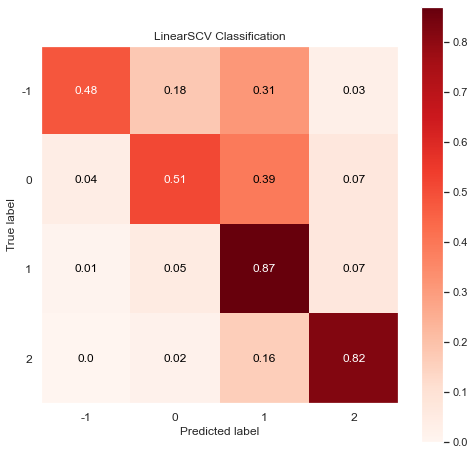

In [85]:
print('\nLinearSVC Model\n', confusion_matrix(y_val, Lsvc_prediction))
print()
print()
print('\nLinearSVC Model\n', classification_report(y_val, Lsvc_prediction))
plot_confusion_matrix(y_val, Lsvc_prediction, normalize=True,figsize=(8,8),cmap='Reds')
plt.title('LinearSCV Classification')
plt.show()

The heatmap of the confusion matrix demonstrates the model's ability to categorize positive samples, with each class having a recall score of:

+ Anti Climate Change : 0.48
+ Neutral : 0.51
+ Pro : 0.87
+ News : 0.82

Linear SVclassifier performed well, however, the concern lies with the sentiment class anti and neutral sentiment which incorrectly classified 31% and 39% as the pro sentiment class, respectively.

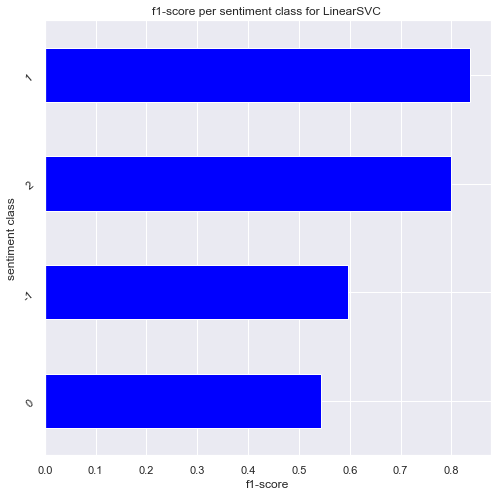


Overall accuracy score for LinearSVC Model : 0.774

Weighted avg f1 score for LinearSVC Model : 0.7676


In [87]:
# # Visual represetation of of the f1 score for each class
report_svc = classification_report(y_val, Lsvc_prediction, output_dict=True)
df_svc = pd.DataFrame(report_svc).transpose()
df_svc.drop(['accuracy'], inplace = True)
df_svc.sort_values(by=['f1-score'],ascending=True, inplace = True)
df_svc.drop(['weighted avg','macro avg'])['f1-score'].plot(kind='barh', figsize = (8,8),
                                                           color = 'blue')
plt.xlabel('f1-score')
plt.ylabel('sentiment class')
plt.yticks(rotation = 40)
plt.title('f1-score per sentiment class for LinearSVC ')
plt.show()

linearSVC_acc = round(accuracy_score(y_val, Lsvc_prediction),4)
print(f'\nOverall accuracy score for LinearSVC Model : {linearSVC_acc}')
linearSVC_f1 = round(f1_score(y_val, Lsvc_prediction, average="weighted"),4)
print(f'\nWeighted avg f1 score for LinearSVC Model : {linearSVC_f1}')

The figure above shows the F1 score of each sentiment class for the classifier -LinearSVC. LinearSVC has performed better than both Random Forest and Decision tree in classifying all the sentiment groups. The sentiment groups show a better distribution of data overall. In addition, the accuracy score of 0.77 and f1 score of 0.77 shows that LinearSVC is the best model thus far.


Logistic Regression
 [[ 130   46   94    8]
 [  17  209  175   24]
 [  19   87 1520  129]
 [   2   13  119  572]]



Logistic Regression
               precision    recall  f1-score   support

          -1       0.77      0.47      0.58       278
           0       0.59      0.49      0.54       425
           1       0.80      0.87      0.83      1755
           2       0.78      0.81      0.79       706

    accuracy                           0.77      3164
   macro avg       0.73      0.66      0.69      3164
weighted avg       0.76      0.77      0.76      3164



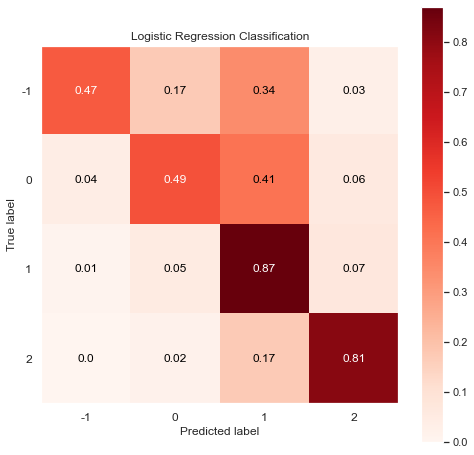

In [88]:
# Report the confusion matrix
print('\nLogistic Regression\n', confusion_matrix(y_val, logreg_prediction))
print()
print()
# Print a classification report
print('\nLogistic Regression\n', classification_report(y_val, logreg_prediction))
plot_confusion_matrix(y_val, logreg_prediction, normalize=True,figsize=(8,8),cmap='Reds')
plt.title('Logistic Regression Classification')
plt.show()

The heatmap of the confusion matrix demonstrates the model's ability to categorize positive samples, with each class having a recall score of:

+ Anti Climate Change : 0.47
+ Neutral : 0.49
+ Pro : 0.87
+ News : 0.81

Logistic Regression performed well and in a similar way to LinearSVC, the concern still lies with the sentiment class anti and neutral sentiment which incorrectly classified 34% and 41% as the pro sentiment class, respectively.

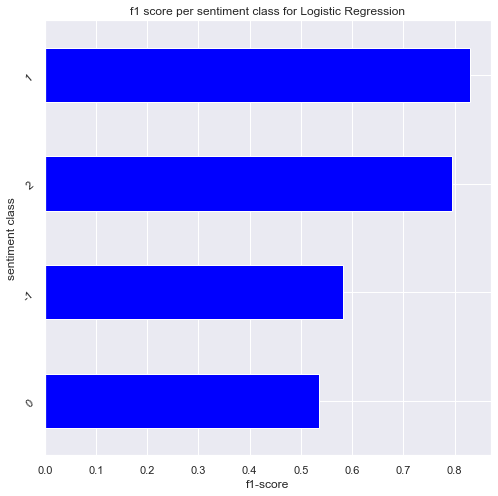


Logistic Regression accuracy Score
 0.7683

Logistic Regression weighted f1 score
 0.7609


In [89]:
# # Visual represetation of of the f1 score for each class
report_logreg = classification_report(y_val, logreg_prediction, output_dict=True)
df_logreg = pd.DataFrame(report_logreg).transpose()
df_logreg.drop(['accuracy'], inplace = True)
df_logreg.sort_values(by=['f1-score'],ascending=True, inplace = True)
df_logreg.drop(['weighted avg','macro avg'])['f1-score'].plot(kind='barh', figsize = (8,8), color = 'blue')
plt.xlabel('f1-score')
plt.ylabel('sentiment class')
plt.yticks(rotation = 40)
plt.title('f1 score per sentiment class for Logistic Regression')
plt.show()

# Print the overall accuracy
logistic_reg_acc = round(accuracy_score(y_val, logreg_prediction),4)
print('\nLogistic Regression accuracy Score\n', logistic_reg_acc)
logistic_reg_f1 = round(f1_score(y_val, logreg_prediction, average="weighted"),4)
print('\nLogistic Regression weighted f1 score\n', logistic_reg_f1)

The figure above shows the F1 score of each sentiment class for the classifier -Logistic regression. Logistic regression has performed better than both Random Forest and Decision tree in classifying all the sentiment groups. However, LinearSVC is still leading in terms of performance, this is shown by the accuracy score of 0.77 and f1 score of 0.76 by Logistic Regression. The perfomance between Logistic regression and LinearSVC still remains fairly similar.

### XGB Classifier


XGB Classifier
 [[  91   32  145   10]
 [  11  149  239   26]
 [  14   55 1520  166]
 [   3   13  139  551]]



XGB Classifier  Classification report :
               precision    recall  f1-score   support

          -1       0.76      0.33      0.46       278
           0       0.60      0.35      0.44       425
           1       0.74      0.87      0.80      1755
           2       0.73      0.78      0.76       706

    accuracy                           0.73      3164
   macro avg       0.71      0.58      0.61      3164
weighted avg       0.72      0.73      0.71      3164



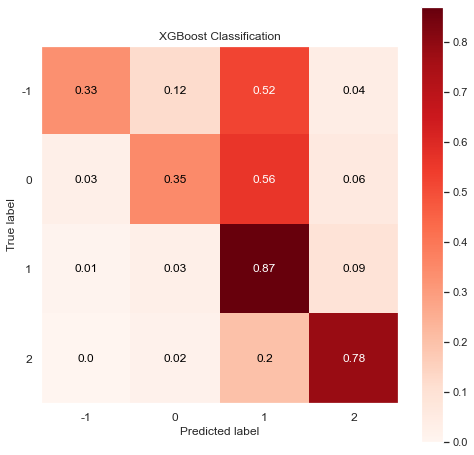

In [90]:
# Confusion matrix for the XGB classifier
print('\nXGB Classifier\n', confusion_matrix(y_val, xgb_prediction))
print()
print()
# The classification report 
print('\nXGB Classifier  Classification report :\n', classification_report(y_val, xgb_prediction))
plot_confusion_matrix(y_val, xgb_prediction, normalize=True,figsize=(8,8),cmap='Reds')
plt.title('XGBoost Classification')
plt.show()

The heatmap of the confusion matrix demonstrates the model's ability to categorize positive samples, with each class having a recall score of:

+ Anti Climate Change : 0.33
+ Neutral : 0.35
+ Pro : 0.87
+ News : 0.78

XGB performed well, but not aswell as the leading model LinearSVC, it incorrectly classified the anti and neutral sentiment by  52% and 46% as the pro sentiment class, respectively.

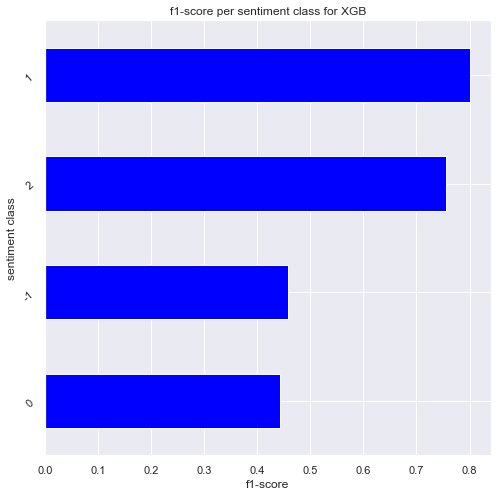


XGB Classifier accuracy Score :
 0.7304

XGB weighted avg f1_score :
 0.7122


In [92]:
# # Visual represetation of of the f1 score for each class
report_xgb = classification_report(y_val, xgb_prediction, output_dict=True)
df_xgb = pd.DataFrame(report_xgb).transpose()
df_xgb.drop(['accuracy'], inplace = True)
df_xgb.sort_values(by=['f1-score'],ascending=True, inplace = True)
df_xgb.drop(['weighted avg','macro avg'])['f1-score'].plot(kind='barh', figsize = (8,8), color = 'blue')
plt.xlabel('f1-score')
plt.ylabel('sentiment class')
plt.yticks(rotation = 40)
plt.title('f1-score per sentiment class for XGB')
plt.show()

# Checking the accuracy score
xgb_acc = round(accuracy_score(y_val, xgb_prediction),4)
print('\nXGB Classifier accuracy Score :\n', xgb_acc)

# Checking the f1_score report for the decison tree model
xgb_f1 = round(f1_score(y_val, xgb_prediction, average="weighted"),4)
print('\nXGB weighted avg f1_score :\n', xgb_f1)

The above bar graph shows the f1 score for each sentiment class using XGBoost classifier. The XGB classifier performs well when classifying Pro sentiment classs as the LinearSVC, but it doesnt do nearly as well when classifying the rest of the sentiment classes. Both the overall accuracy score and f1 score is good, however, it still underperforms when compared to linearSVC.

### SGD Classifier


SGD Classifier
 [[ 142   46   80   10]
 [  19  204  174   28]
 [  26   81 1530  118]
 [   5   12  122  567]]



SGD Classifier  Classification report :
               precision    recall  f1-score   support

          -1       0.74      0.51      0.60       278
           0       0.59      0.48      0.53       425
           1       0.80      0.87      0.84      1755
           2       0.78      0.80      0.79       706

    accuracy                           0.77      3164
   macro avg       0.73      0.67      0.69      3164
weighted avg       0.77      0.77      0.77      3164



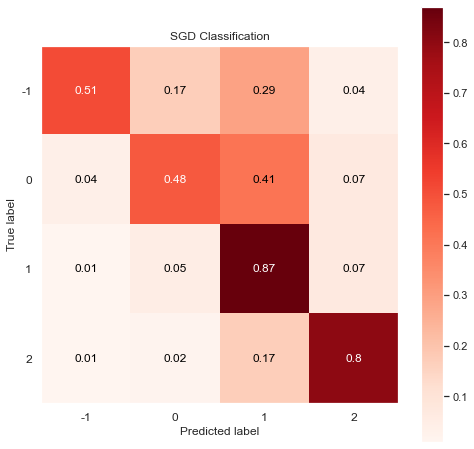

In [93]:
# Confusion matrix for the SGD classifier
print('\nSGD Classifier\n', confusion_matrix(y_val, SGD_prediction))
print()
print()
# The classification report 
print('\nSGD Classifier  Classification report :\n', classification_report(y_val, SGD_prediction))
plot_confusion_matrix(y_val, SGD_prediction, normalize=True,figsize=(8,8),cmap='Reds')
plt.title('SGD Classification')
plt.show()

The heatmap of the confusion matrix demonstrates the model's ability to categorize positive samples, with each class having a recall score of:

+ Anti Climate Change : 0.45
+ Neutral : 0.48
+ Pro : 0.87
+ News : 0.81

SDG performed really well, the performance is as good as LinearSVC, but it incorrectly classified the anti and neutral sentiment by  33% and 41% as the pro sentiment class, respectively, which is slightly worse than the LinearSVC.

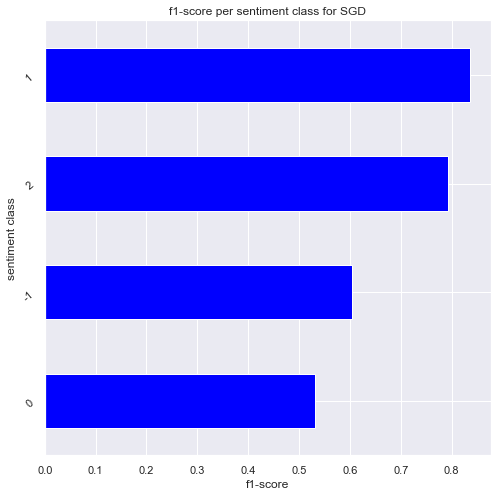


SGD Classifier accuracy Score :
 0.7721

SGD weighted avg f1_score :
 0.7651


In [94]:
# # Visual represetation of of the f1 score for each class
report_sgd = classification_report(y_val, SGD_prediction, output_dict=True)
df_sgd = pd.DataFrame(report_sgd).transpose()
df_sgd.drop(['accuracy'], inplace = True)
df_sgd.sort_values(by=['f1-score'],ascending=True, inplace = True)
df_sgd.drop(['weighted avg','macro avg'])['f1-score'].plot(kind='barh', figsize = (8,8), color = 'blue')
plt.xlabel('f1-score')
plt.ylabel('sentiment class')
plt.yticks(rotation = 40)
plt.title('f1-score per sentiment class for SGD')
plt.show()

# Checking the accuracy score
sgd_acc = round(accuracy_score(y_val, SGD_prediction),4)
print('\nSGD Classifier accuracy Score :\n', sgd_acc)

# Checking the f1_score report for the decison tree model
sgd_f1 = round(f1_score(y_val, SGD_prediction, average="weighted"),4)
print('\nSGD weighted avg f1_score :\n', sgd_f1)

The above bar graph shows the f1 score for each sentiment class using Stochastic Gradient Descent classifier. The SGD classifier is just as good at classifying Pro sentiment classs as the LinearSVC both achieving an f1 score of 0.84 however falls short in classifying the rest of the sentiment classes. The overall accuracy score of 0.77 is similar to that of linearSVC but the f1 score is lower at 0.76, for that reason, LinearSVC is still leading in performance.

### Support Vector Classifier


Support Vector Classifier
 [[  64   39  156   19]
 [   4  170  212   39]
 [   3   54 1485  213]
 [   1    9   97  599]]



Support Vector Classifier  Classification report :
               precision    recall  f1-score   support

          -1       0.89      0.23      0.37       278
           0       0.62      0.40      0.49       425
           1       0.76      0.85      0.80      1755
           2       0.69      0.85      0.76       706

    accuracy                           0.73      3164
   macro avg       0.74      0.58      0.60      3164
weighted avg       0.74      0.73      0.71      3164



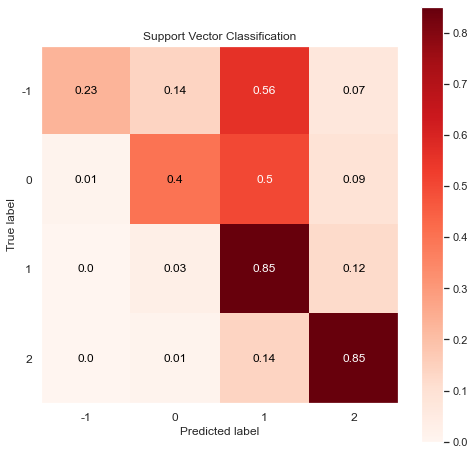

In [95]:
# Confusion matrix for the random forest classifier
print('\nSupport Vector Classifier\n', confusion_matrix(y_val, SVC_prediction))
print()
print()
# The classification report 
print('\nSupport Vector Classifier  Classification report :\n', classification_report(y_val, SVC_prediction))
plot_confusion_matrix(y_val, SVC_prediction, normalize=True,figsize=(8,8),cmap='Reds')
plt.title('Support Vector Classification')
plt.show()

The heatmap of the confusion matrix demonstrates the model's ability to categorize positive samples, with each class having a recall score of:

+ Anti Climate Change : 0.23
+ Neutral : 0.4
+ Pro : 0.85
+ News : 0.85

Support Vector Classifier performed well, but not aswell as the leading model LinearSVC in terms of distribution of the data, it incorrectly classified the anti and neutral sentiment by  56% and 50% as the pro sentiment class, respectively.

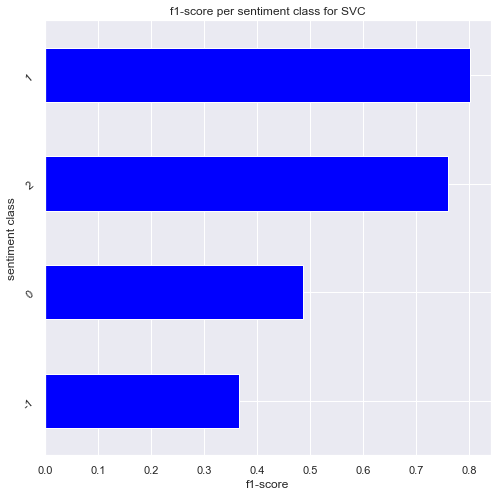


Support Vector Classifier accuracy Score : 0.7326

Support Vector Classifier weighted avg f1 score : 0.7119


In [96]:
# # Visual represetation of of the f1 score for each class
report_svc = classification_report(y_val, SVC_prediction, output_dict=True)
df_SVC = pd.DataFrame(report_svc).transpose()
df_SVC.drop(['accuracy'], inplace = True)
df_SVC.sort_values(by=['f1-score'],ascending=True, inplace = True)
df_SVC.drop(['weighted avg','macro avg'])['f1-score'].plot(kind='barh', figsize = (8,8), color = 'blue')
plt.xlabel('f1-score')
plt.ylabel('sentiment class')
plt.yticks(rotation = 40)
plt.title('f1-score per sentiment class for SVC')
plt.show()

# Checking the accuracy score
svc_acc = round(accuracy_score(y_val, SVC_prediction),4)
print(f'\nSupport Vector Classifier accuracy Score : {svc_acc}')
svc_f1 = round(f1_score(y_val, SVC_prediction, average="weighted"),4)
print(f'\nSupport Vector Classifier weighted avg f1 score : {svc_f1}')

The figure above shows the F1 score of each sentiment class for the classifier -Support Vector Classifier(SVC). SVC performed well, just like our leading model LinearSVC it classied Pro sentiment class, followed by the News sentiment tweets well.
Unlike most of the models we've build this far, the Support Vector Classifier struggle more with classifying the Anti sentiment class with an f1 score of below 0.4. The overall accuracy and f1 score are 0.73 and 0.71 respectfully, which is lower than Linear SVC.

### Ridge


Ridge Classifier
 [[ 128   55   81   14]
 [  16  211  172   26]
 [  11   81 1526  137]
 [   3   15  115  573]]



Ridge Classifier  Classification report :
               precision    recall  f1-score   support

          -1       0.81      0.46      0.59       278
           0       0.58      0.50      0.54       425
           1       0.81      0.87      0.84      1755
           2       0.76      0.81      0.79       706

    accuracy                           0.77      3164
   macro avg       0.74      0.66      0.69      3164
weighted avg       0.77      0.77      0.76      3164



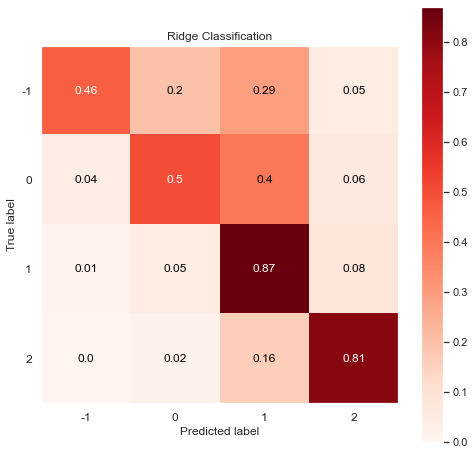

In [97]:
# Confusion matrix for the Ridge Classifier
print('\nRidge Classifier\n', confusion_matrix(y_val, ridge_prediction))
print()
print()
# The classification report 
print('\nRidge Classifier  Classification report :\n', classification_report(y_val, ridge_prediction))
plot_confusion_matrix(y_val, ridge_prediction, normalize=True,figsize=(8,8),cmap='Reds')
plt.title('Ridge Classification')
plt.show()

The heatmap of the confusion matrix demonstrates the model's ability to categorize positive samples, with each class having a recall score of:

+ Anti Climate Change : 0.46
+ Neutral : 0.5
+ Pro : 0.87
+ News : 0.81

The concern here is that the Ridge classification classified 40% of of neutral tweets as Pro climate change tweets. Otherwise the model did really well with the distribution.

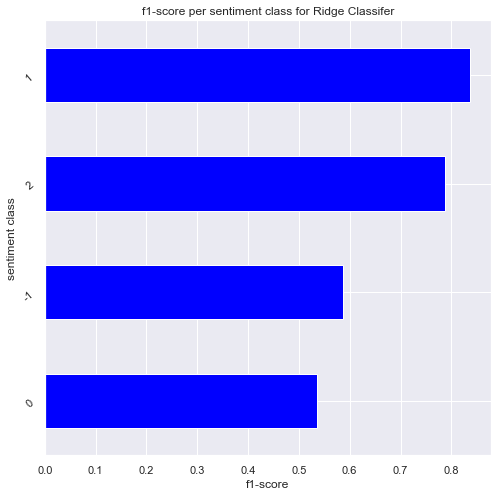


Ridge Classifier accuracy Score : 0.7705

Ridge Classifier weighted avg f1 score : 0.7632


In [98]:
# # Visual represetation of of the f1 score for each class
report_ridge = classification_report(y_val, ridge_prediction, output_dict=True)
df_ridge = pd.DataFrame(report_ridge).transpose()
df_ridge.drop(['accuracy'], inplace = True)
df_ridge.sort_values(by=['f1-score'],ascending=True, inplace = True)
df_ridge.drop(['weighted avg','macro avg'])['f1-score'].plot(kind='barh', figsize = (8,8), color = 'blue')
plt.xlabel('f1-score')
plt.ylabel('sentiment class')
plt.yticks(rotation = 40)
plt.title('f1-score per sentiment class for Ridge Classifer')
plt.show()

# Checking the accuracy score
ridge_acc = round(accuracy_score(y_val, ridge_prediction),4)
print(f'\nRidge Classifier accuracy Score : {ridge_acc}')
ridge_f1 = round(f1_score(y_val, ridge_prediction, average="weighted"),4)
print(f'\nRidge Classifier weighted avg f1 score : {ridge_f1}')

The figure above shows the F1 score of each sentiment class for the classifier -Ridge classifier. Ridge classifier performed well, just like our leading model LinearSVC it classied Pro sentiment class, followed by the News sentiment tweets well. The overall accuracy and f1 score are 0.77 and 0.76 just like the SVC model, so the LinearSVC still leads in terms of performance,

## 6.2 `Model Comparison`

In [99]:
# Creating a dataframe with our models and their performances metrics
classifier_scores = {'Classifiers':['Decision Tree', 'Random Forest','LinearSVC',
                                    'Logistic Regression', 'XGboost', 'Stochastic Gradient Descent',
                                    'Support Vector Classifier','Ridge Classifier'],
                    'Accuracy':[decison_tree_acc,random_forest_acc,
                                linearSVC_acc,logistic_reg_acc, xgb_acc, sgd_acc, svc_f1, ridge_acc],
                     'Weighted avg f1 Score':[decision_tree_f1,random_forest_f1,
                                       linearSVC_f1,logistic_reg_f1, xgb_f1, sgd_f1, svc_f1, ridge_f1]}
df= pd.DataFrame(classifier_scores)
df.sort_values(by=['Accuracy'],ascending=True, inplace = True)
df

Classifiers  Accuracy  Weighted avg f1 Score
0                Decision Tree    0.6590                 0.6514
6    Support Vector Classifier    0.7119                 0.7119
1                Random Forest    0.7193                 0.6887
4                      XGboost    0.7304                 0.7122
3          Logistic Regression    0.7683                 0.7609
7             Ridge Classifier    0.7705                 0.7632
5  Stochastic Gradient Descent    0.7721                 0.7651
2                    LinearSVC    0.7740                 0.7676

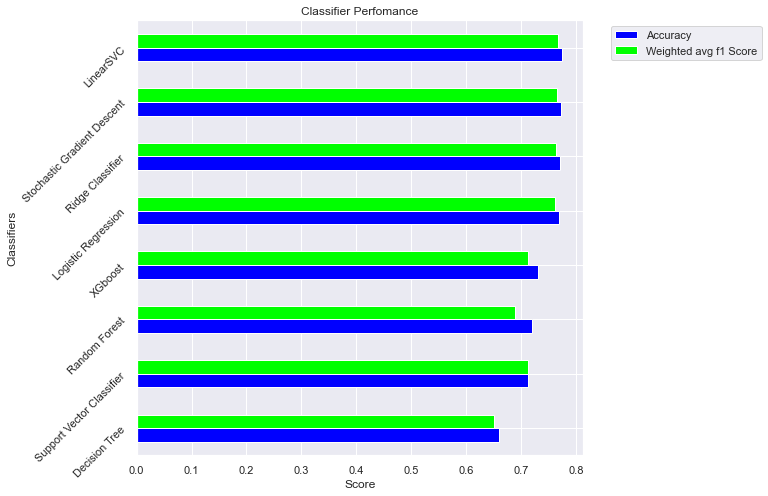

In [118]:
df.set_index(df['Classifiers'], inplace = True)
df.drop(['Classifiers'],axis = 1)
df.plot(kind='barh', figsize = (8,8),colormap='brg')
plt.xlabel('Score')
plt.yticks(rotation = 45)
plt.title('Classifier Perfomance')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

The bar graph above compares all the 8 models based on their accuracy score and associated wighted f1 score. We see that our top 3 best performing models are LinearSVC, Ridge Classifier and Stochastic Gradient Descent respectively, ensemble methods will be used to try and improve our results.

The Decision Tree classifer is the lowest performing, with the lowest accuracy and wighted f1 scores of 0.66 and 0.65 respectivey. LinearSVC is the best performing model out of all 8 models that we've tried thus far with an accuracy score of 0.77 and a weighted f1 score of 0.77

## 6.3 Ensemble Methods

In machine learning, ensemble learning is the process of merging many models in order to improve overall model performance. Ensembles are made up of numerous heterogeneous or homogeneous models that have been trained on the same dataset. Each of these models is used to create predictions on the same input, which are then aggregated across all models in some way (for example, by taking the mean) to give the final result.

We are using Heterogeneous ensemble method and will look at the Voting classifier on our best performing models. A voting classifier is a classification approach that makes predictions using many classifiers. It's especially useful when a data scientist or machine learning engineer isn't sure which classification technique to choose. As a result, the voting classifier uses predictions from numerous classifiers to create predictions based on the most common one.

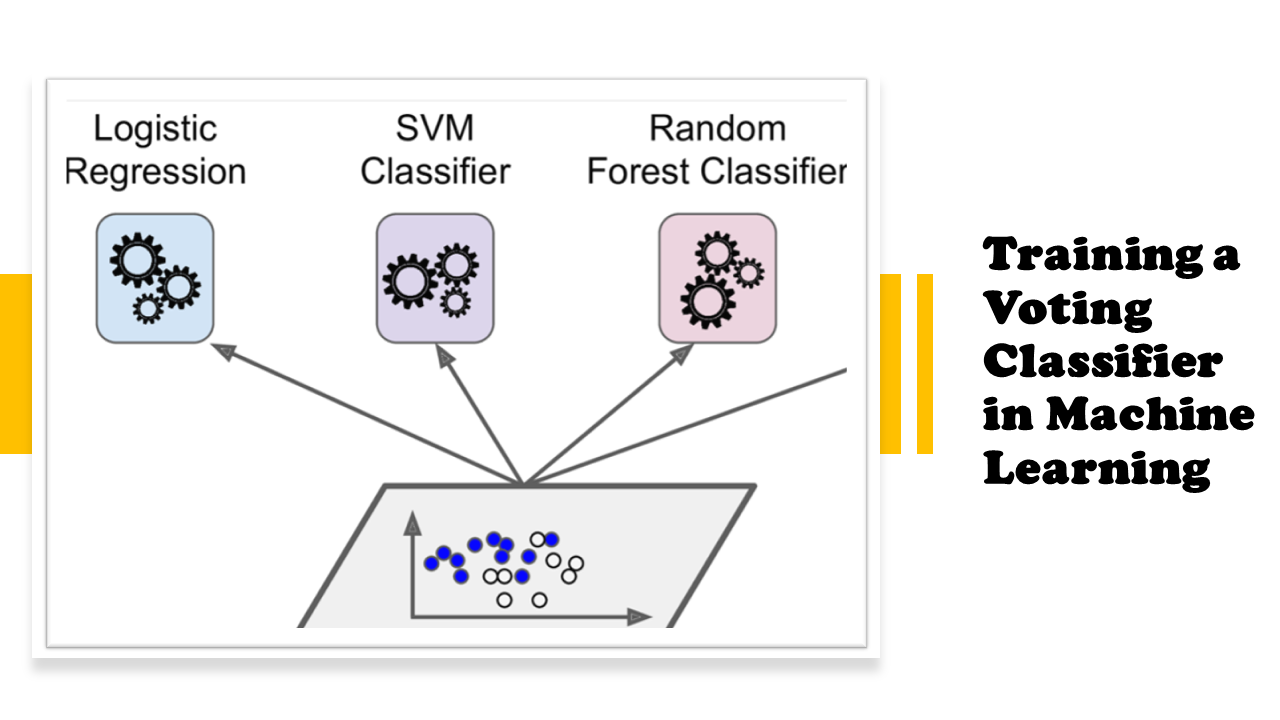

In [119]:
# Define the models which we'll include in our ensemble. 
# We pass a list of tuples, which each have a string identifier for the
# model (arbitrary choice), along the actual instantiated sklearn model.  
models = [("LinearSVC",Lsvc_count),("Stochastic Gradient Descent",SGD_count),("Ridge Classified",ridge_count)]

# Specify weights for weighted model averaging
model_weightings = np.array([0.1,0.3,0.6])

# building the voting classifier
Voting_classifier = VotingClassifier(estimators=models,weights=model_weightings)

In [121]:
# training the voting classifier
Voting_classifier.fit(X_train, y_train)

COMET ERROR: Failed to extract parameters from estimator
COMET ERROR: Failed to extract parameters from estimator


VotingClassifier(estimators=[('LinearSVC',
                              Pipeline(steps=[('CountVec',
                                               CountVectorizer(max_features=180000,
                                                               ngram_range=(1,
                                                                            2))),
                                              ('svc', LinearSVC())])),
                             ('Stochastic Gradient Descent',
                              Pipeline(steps=[('CountVec',
                                               CountVectorizer(max_features=180000,
                                                               ngram_range=(1,
                                                                            2))),
                                              ('SGD', SGDClassifier())])),
                             ('Ridge Classified',
                              Pipeline(steps=[('CountVec',
                                 

In [122]:
voting_prediction = Voting_classifier.predict(X_val) # Voting Classifier predictions

In [123]:
print('\nVoting Classifier  Classification report :\n', classification_report(y_val, voting_prediction))

# Checking the accuracy score
voting_acc = round(accuracy_score(y_val, voting_prediction),4)
print(f'\nOverall accuracy for the Voting Classifier : {voting_acc}')
voting_f1 = round(f1_score(y_val, voting_prediction, average="weighted"),4)
print(f'\nWeighted avg f1 score for the Voting Classifier : {voting_f1}')


Voting Classifier  Classification report :
               precision    recall  f1-score   support

          -1       0.81      0.46      0.59       278
           0       0.58      0.50      0.54       425
           1       0.81      0.87      0.84      1755
           2       0.76      0.81      0.79       706

    accuracy                           0.77      3164
   macro avg       0.74      0.66      0.69      3164
weighted avg       0.77      0.77      0.76      3164


Overall accuracy for the Voting Classifier : 0.7705

Weighted avg f1 score for the Voting Classifier : 0.7632


The voting  classifer did a good job at classifying the sentiment classes which 'Neutral' sentiment class being the poorly classified one
- achieving the f1 score of
- `Pro` sentiment class : 0.84
- `News` sentiment class : 0.79
- `Anti` sentiment class: 0.59
- `Neutral` sentiment class : 0.54

The overall accuracuy and f1 score are 0.77 and 0.76 respectively which is not a good improvement from our best performing model LinearSVC.

## 6.4 Hyperpatrameter tuning

We will be doing hyperparameter tunning using `Parfit`, because it generally performs better and the run time is lower compared to gridsearch

* Models we will perform hyperparameter tunning on
  * LinearSVC
  * Stochastic Gradient Descent
  * Ridge Classifier
    
The disadvantage of using pipelines to build our models is that we can't easily obtain the parameters for our models. As a result, we won't be using pipelines to perform hyperparameter tuning and obtain the best parameters for our models. Instead, we'll convert raw text data to numeric data separately from building the models.

In [124]:
# We have to to prepare our data again since we wont be using the pipelines

df_train = train.copy()
df_test = test.copy()

df_train['message'] = replace_sentiments(df_train)
df_test['message'] = replace_sentiments(df_test)
df_train['clean_tweets'] = clean_tweets(df_train)
df_test['clean_tweets'] = clean_tweets(df_test)

normalizer = WordNetLemmatizer()
df_train['clean_tweets'] = df_train['clean_tweets'].apply(lambda x: [normalizer.lemmatize(token, POS(token)) for token in x])
df_test['clean_tweets'] = df_test['clean_tweets'].apply(lambda x: [normalizer.lemmatize(token, POS(token)) for token in x])



X = df_train['clean_tweets']
y = df_train['sentiment']
X_test = df_test['clean_tweets']


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state = 42)

X_train = list(X_train.apply(' '.join))
X_val = list(X_val.apply(' '.join))
X_test = list(X_test.apply(' '.join))

In [125]:
vectorizer = CountVectorizer(analyzer = 'word', 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 180000,
                             min_df = 1,
                             ngram_range = (1,2)
                            )
vectorizer.fit(X_train)
X_train = vectorizer.transform(X_train)
X_val = vectorizer.transform(X_val)
X_test = vectorizer.transform(X_test)

In [126]:
# Saving the model
import pickle
model_save_path = 'vect.pkl'
with open(model_save_path, 'wb') as file:
  pickle.dump(vectorizer, file)

### 6.4.1 Tuning

### LinearSVC

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   29.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:  1.8min remaining:   23.1s
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:  2.1min remaining:    7.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.3s finished


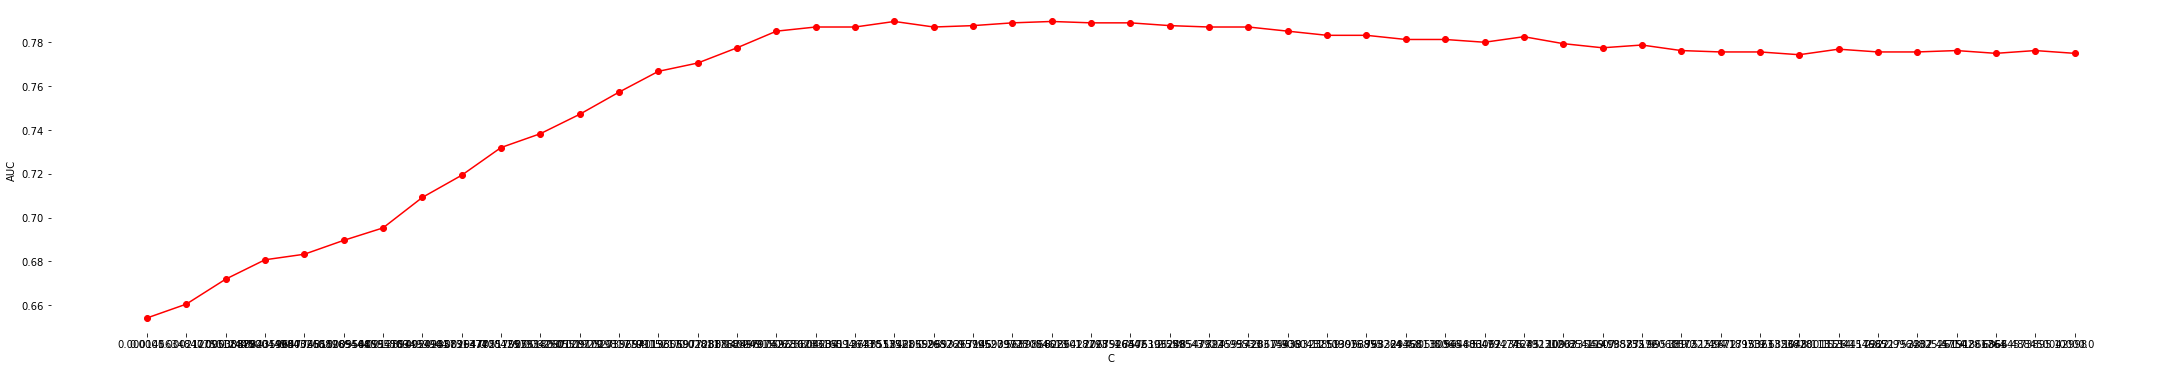

LinearSVC(C=0.12648552168552957) 
 0.7895069532237674


In [207]:
# Tunning LinearSVC using parfit
grid = {'C': np.logspace(-4, 4, 50)}
paramGrid = ParameterGrid(grid)
bestModel, bestScore, allModels, allScores = pf.bestFit(LinearSVC, paramGrid,
           X_train, y_train, X_val, y_val, 
          metric = accuracy_score,
           scoreLabel = "AUC")
print(bestModel, '\n',bestScore)

The AUC plot shows the accuracy score for each value fo the C parameter that the model is fitted with. The parfit method peformed 50 fits and with the hyperparameter C=0.12648552168552957, achieved the accuracy score of 0.78 which is an improvement from 0.77.

In [127]:
# We now retrain the LinearSVC with the best parameters we got from the tuning method that performed the best

final_lsvc = LinearSVC(C=0.12648552168552957, class_weight=None, dual=True,
          fit_intercept=True, intercept_scaling=1, loss='squared_hinge',
          max_iter=1000, multi_class='ovr', penalty='l2', random_state=None,
          tol=0.0001, verbose=0) 
final_lsvc.fit(X_train, y_train)
LinearSVC_prediction = final_lsvc.predict(X_val)
final_svc_acc = accuracy_score(y_val, LinearSVC_prediction)
print(f'\nOverall accuracy score for LinearSVC : {final_svc_acc}')



# Saving the model
import pickle
model_save_path = 'linear_svc.pkl'
with open(model_save_path, 'wb') as file:
    pickle.dump(final_lsvc, file)
    
  
 # loading the saved LinearSVC model
model_load_path = 'linear_svc.pkl'
with open(model_load_path, 'rb') as file:
    Logistic_reg_tuned=pickle.load(file)



Overall accuracy score for LinearSVC : 0.7895069532237674


In [128]:
# Saving the model
import pickle
model_save_path = 'final_lsvc.pkl'
with open(model_save_path, 'wb') as file:
  pickle.dump(final_lsvc, file)

In [129]:
Final_lsvc_acc = accuracy_score(y_val, LinearSVC_prediction)
Final_lsvc_f1 = f1_score(y_val, LinearSVC_prediction, average = 'weighted')

### SGD

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:    4.4s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:    4.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.8s finished


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.7s finished


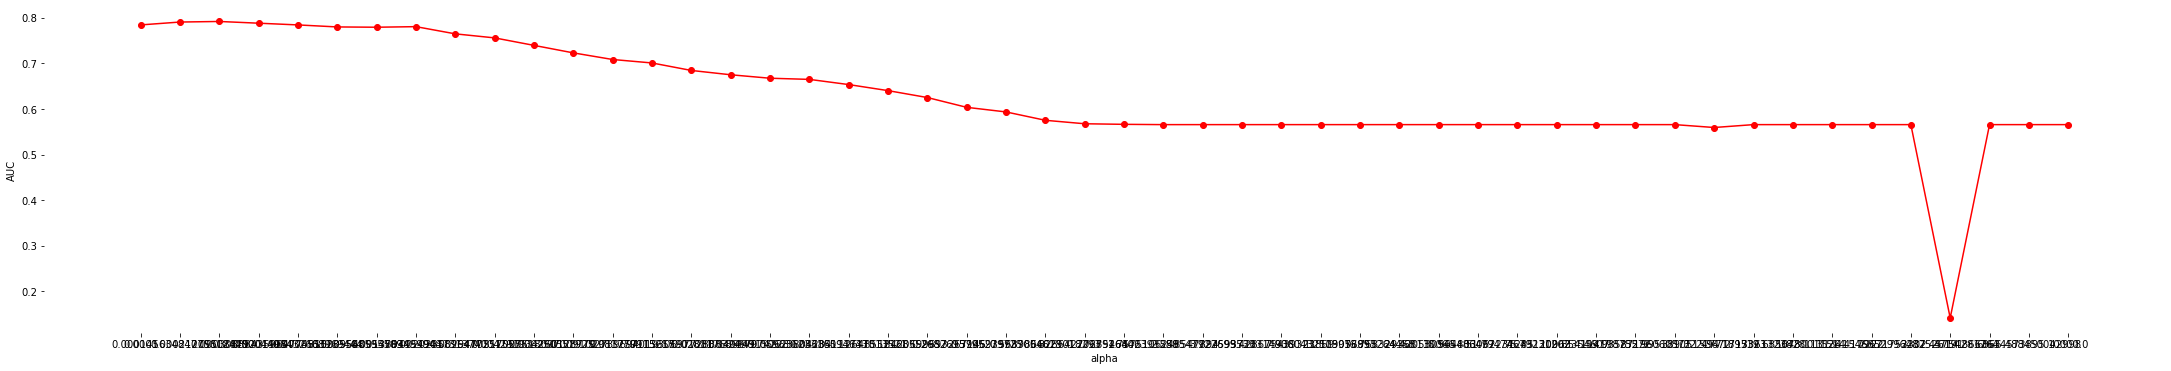

SGDClassifier(alpha=0.00021209508879201905) 

 0.7920353982300885


In [216]:
## Tuning Ridge classifier using parfit
grid = {
    'alpha':  np.logspace(-4, 4, 50), # learning rate
}
paramGrid = ParameterGrid(grid)

bestModel, bestScore, allModels, allScores = pf.bestFit(SGDClassifier, paramGrid,
           X_train, y_train, X_val, y_val, 
           metric = accuracy_score,
           scoreLabel = "AUC")

print(bestModel,'\n\n' ,bestScore)

The score is better after tuning from 0.77 to 0.78, it performes slightly better than the LinearSVC.

In [130]:
# We now retrain the LinearSVC with the best parameters we got from the tuning method that performed the best

SGD_tuned = SGDClassifier(alpha=0.0004498432668969444, class_weight=None, #dual=True,
          fit_intercept=True,  loss='squared_hinge',
          max_iter=1000, penalty='l2', random_state=None,
          tol=0.0001, verbose=0) 
SGD_tuned.fit(X_train, y_train)
SGDClassifier_prediction = SGD_tuned.predict(X_val)
SGD_tuned_acc = accuracy_score(y_val, SGDClassifier_prediction)
print(f'\nOverall accuracy score for SDG : {SGD_tuned_acc}')


 #Saving the model
import pickle
model_save_path = 'SGD.pkl'
with open(model_save_path, 'wb') as file:
    pickle.dump(final_lsvc, file)
    
  #intercept_scaling=1,multi_class='ovr'
 # loading the saved Logistic Regression model
model_load_path = 'SGD.pkl'
with open(model_load_path, 'rb') as file:
    Logistic_reg_tuned=pickle.load(file)
 


Overall accuracy score for SDG : 0.7737041719342604


In [180]:
# Checking the accuracy score
#SGDClassifier_prediction = SGD_tuned.predict(X_val)

#SGD_tuned_acc = round(accuracy_score(y_val, SGDClassifier_prediction,4)
#print(f'\nOverall accuracy score for SGD accuracy Score : {SGD_tuned_acc}')
#SGD_tuned_acc = round(f1_score(y_val, SGDClassifier_prediction, average="weighted"),4)
#print(f'\nWeighted avg f1 score for SGD : {SGD_f1}')

There is no major change after tuning.

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   57.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:  2.3min remaining:   30.8s
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:  2.4min remaining:    8.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.2s finished


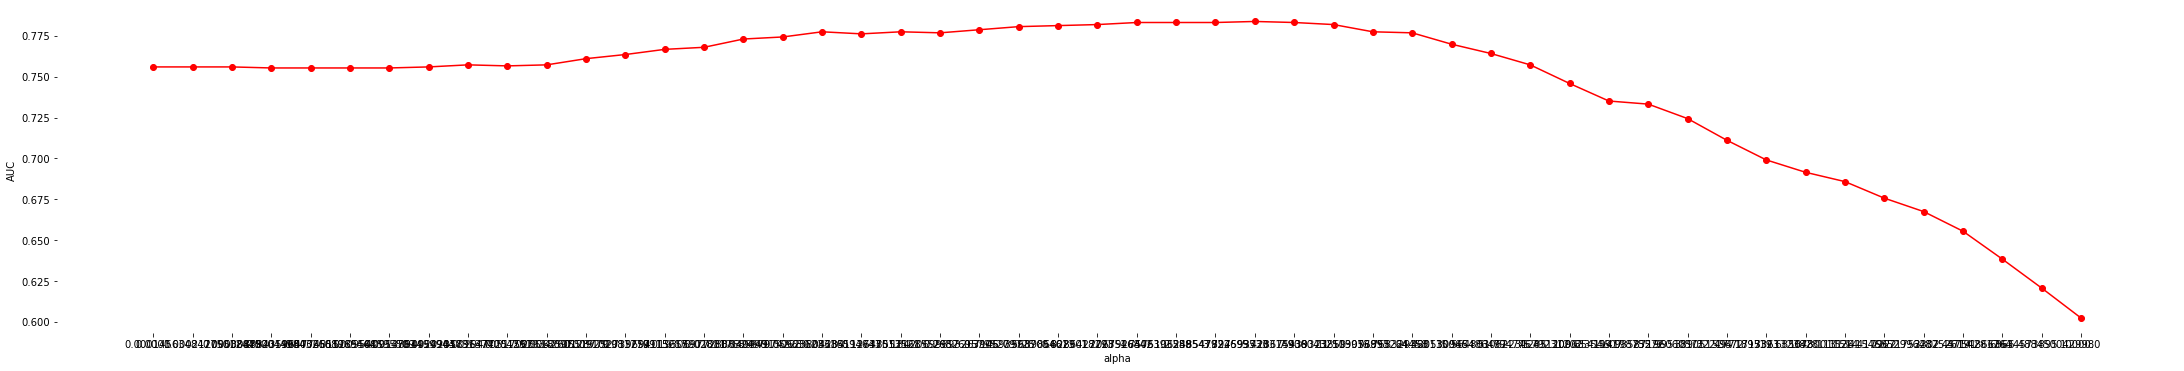

RidgeClassifier(alpha=3.727593720314938) 

 0.7838179519595448


In [218]:
## Tuning Ridge classifier using parfit
grid = {
    'alpha':  np.logspace(-4, 4, 50), # learning rate
}
paramGrid = ParameterGrid(grid)

bestModel, bestScore, allModels, allScores = pf.bestFit(RidgeClassifier, paramGrid,
           X_train, y_train, X_val, y_val, 
           metric = accuracy_score,
           scoreLabel = "AUC")

print(bestModel,'\n\n' ,bestScore)

In [131]:
# retraining the best Ridge Classifer model we have
ridge_tuned = RidgeClassifier(alpha=1.7575106248547894, class_weight=None, copy_X=True,
                fit_intercept=True, max_iter=None, normalize=False,
                random_state=None, solver='auto', tol=0.001) 
ridge_tuned.fit(X_train, y_train)

RidgeClassifier(alpha=1.7575106248547894, normalize=False)

In [132]:
# Checking the accuracy score
ridge_prediction_tuned =ridge_tuned.predict(X_val)

ridge_acc_2 = round(accuracy_score(y_val, ridge_prediction_tuned),4)
print(f'\nOverall accuracy score for Ridge Classifier accuracy Score : {ridge_acc}')
ridge_f1_2 = round(f1_score(y_val, ridge_prediction_tuned, average="weighted"),4)
print(f'\nWeighted avg f1 score for Ridge Classifier : {ridge_f1}')


Overall accuracy score for Ridge Classifier accuracy Score : 0.7705

Weighted avg f1 score for Ridge Classifier : 0.7632


In [133]:
# Saving the model
import pickle
model_save_path = 'Ridgeclfr_2.pkl'
with open(model_save_path, 'wb') as file:
  pickle.dump(ridge_tuned, file)

### 6.5 Model Selection

In [134]:
# Creating a dataframe with our models and their performances metrics
classifier_scores = {'Classifiers':['Decision Tree', 'Random Forest','LinearSVC'
                                    ,'Logistic Regression', 'XGBoost Classifier', 'Stochastic Gradient Descent',
                                    'Support Vector Classifier', 'Voting Classifer',
                                    'Tunned_LinearSVC','Tunned LogisticReg','Ridge Classifier', 'Tuned Ridge Classifier'],
                    'Accuracy':[decison_tree_acc,random_forest_acc,
                                linearSVC_acc,logistic_reg_acc,xgb_acc, sgd_acc, svc_f1, voting_acc
                                ,Final_lsvc_acc ,SGD_tuned_acc,
                                 ridge_acc, ridge_acc_2],
                     'Weighted avg f1 Score':[decision_tree_f1,random_forest_f1,
                                       linearSVC_f1,logistic_reg_f1,xgb_f1, sgd_f1, svc_f1,
                                              voting_f1, Final_lsvc_f1 ,sgd_f1, 
                                              ridge_f1, ridge_f1_2]}




df= pd.DataFrame(classifier_scores)
df.sort_values(by=['Accuracy'],ascending=True, inplace = True)
df


df= pd.DataFrame(classifier_scores)
df.sort_values(by=['Accuracy'],ascending=True, inplace = True)
df

Classifiers  Accuracy  Weighted avg f1 Score
0                 Decision Tree  0.659000               0.651400
6     Support Vector Classifier  0.711900               0.711900
1                 Random Forest  0.719300               0.688700
4            XGBoost Classifier  0.730400               0.712200
3           Logistic Regression  0.768300               0.760900
7              Voting Classifer  0.770500               0.763200
10             Ridge Classifier  0.770500               0.763200
5   Stochastic Gradient Descent  0.772100               0.765100
9            Tunned LogisticReg  0.773704               0.765100
2                     LinearSVC  0.774000               0.767600
11       Tuned Ridge Classifier  0.783200               0.775200
8              Tunned_LinearSVC  0.789507               0.782298

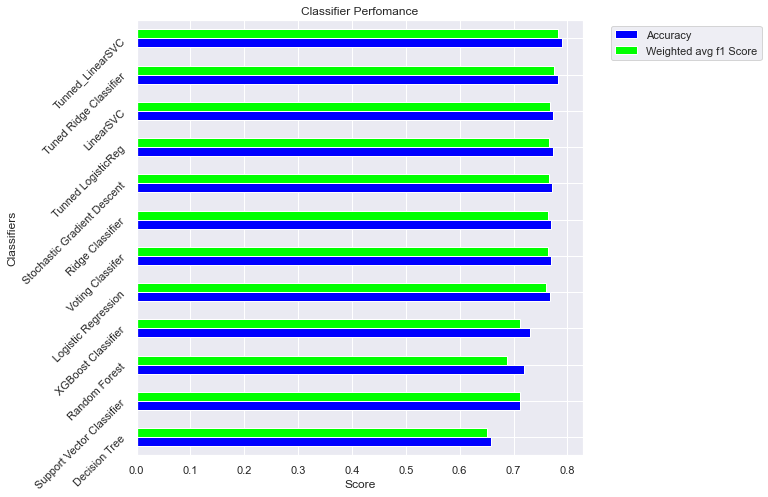

In [135]:
df.set_index(df['Classifiers'], inplace = True)
df.drop(['Classifiers'],axis = 1)
df.plot(kind='barh', figsize = (8,8),colormap='brg')
plt.xlabel('Score')
plt.yticks(rotation = 45)
plt.title('Classifier Perfomance')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

Out of the 12 models built, Linear SVC comes out on top, as the best performing model

### 6.6 Submit results

In [136]:
y_pred = final_lsvc.predict(X_test)

In [137]:
#y_pred = ridge_tuned.predict(X_test)

In [138]:
y_pred

array([2, 0, 1, ..., 0, 0, 1], dtype=int64)

In [139]:
test['sentiment'] = y_pred

In [140]:
test[['tweetid','sentiment']].to_csv('tlsvc_2 Submission.csv', index=False)

In [141]:
test[['tweetid','sentiment']]

tweetid  sentiment
0       169760          2
1        35326          0
2       224985          1
3       476263          1
4       872928          0
...        ...        ...
10541   895714          1
10542   875167          1
10543    78329          0
10544   867455          0
10545   470892          1

[10546 rows x 2 columns]

### 6.7 Closing the comet experiment

In [142]:
# close the experiment
#experiment.end()
#experiment.display()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/bohlalek/general/0366155bd1bc4b0db62def00d73a8ca4
COMET INFO:   Parameters:
COMET INFO:     C                                                     : 0.12648552168552957
COMET INFO:     CountVec                                              : CountVectorizer(max_features=180000, ngram_range=(1, 2))
COMET INFO:     CountVec__analyzer                                    : word
COMET INFO:     CountVec__binary                                      : False
COMET INFO:     CountVec__decode_error                                : strict
COMET INFO:     CountVec__dtype                                       : <class 'numpy.int64'>
COMET INFO:     CountVec__encoding                                    : utf-8
COMET INFO:     CountVec__input                       

COMET INFO:     Ridge Classified__Ridge__copy_X                       : True
COMET INFO:     Ridge Classified__Ridge__fit_intercept                : True
COMET INFO:     Ridge Classified__Ridge__max_iter                     : 1
COMET INFO:     Ridge Classified__Ridge__normalize                    : deprecated
COMET INFO:     Ridge Classified__Ridge__positive                     : False
COMET INFO:     Ridge Classified__Ridge__random_state                 : 1
COMET INFO:     Ridge Classified__Ridge__solver                       : auto
COMET INFO:     Ridge Classified__Ridge__tol                          : 0.001
COMET INFO:     Ridge Classified__memory                              : 1
COMET INFO:     Ridge Classified__steps                               : [('CountVec', CountVectorizer(max_features=180000, ngram_range=(1, 2))), ('Ridge', RidgeClassifier())]
COMET INFO:     Ridge Classified__verbose                             : False
COMET INFO:     Ridge__alpha                           

COMET INFO:     Stochastic Gradient Descent__CountVec                 : CountVectorizer(max_features=180000, ngram_range=(1, 2))
COMET INFO:     Stochastic Gradient Descent__CountVec__analyzer       : word
COMET INFO:     Stochastic Gradient Descent__CountVec__binary         : False
COMET INFO:     Stochastic Gradient Descent__CountVec__decode_error   : strict
COMET INFO:     Stochastic Gradient Descent__CountVec__dtype          : <class 'numpy.int64'>
COMET INFO:     Stochastic Gradient Descent__CountVec__encoding       : utf-8
COMET INFO:     Stochastic Gradient Descent__CountVec__input          : content
COMET INFO:     Stochastic Gradient Descent__CountVec__lowercase      : True
COMET INFO:     Stochastic Gradient Descent__CountVec__max_df         : 1.0
COMET INFO:     Stochastic Gradient Descent__CountVec__max_features   : 180000
COMET INFO:     Stochastic Gradient Descent__CountVec__min_df         : 1
COMET INFO:     Stochastic Gradient Descent__CountVec__ngram_range    : (1, 2)


COMET INFO:     logistic_verbose                                      : 0
COMET INFO:     logistic_warm_start                                   : False
COMET INFO:     loss                                                  : squared_hinge
COMET INFO:     max_depth                                             : 1
COMET INFO:     max_features                                          : auto
COMET INFO:     max_iter                                              : 12
COMET INFO:     max_leaf_nodes                                        : 1
COMET INFO:     max_samples                                           : 1
COMET INFO:     memory                                                : 1
COMET INFO:     min_impurity_decrease                                 : 0.0
COMET INFO:     min_samples_leaf                                      : 1
COMET INFO:     min_samples_split                                     : 2
COMET INFO:     min_weight_fraction_leaf                              : 0.0
COMET INFO:   

COMET INFO:     svc__max_iter                                         : 1000
COMET INFO:     svc__multi_class                                      : ovr
COMET INFO:     svc__penalty                                          : l2
COMET INFO:     svc__random_state                                     : 1
COMET INFO:     svc__tol                                              : 0.0001
COMET INFO:     svc__verbose                                          : 0
COMET INFO:     svc_class_weight                                      : 1
COMET INFO:     svc_dual                                              : True
COMET INFO:     svc_fit_intercept                                     : True
COMET INFO:     svc_intercept_scaling                                 : 1
COMET INFO:     svc_loss                                              : squared_hinge
COMET INFO:     svc_max_iter                                          : 1000
COMET INFO:     svc_multi_class                                       : ovr
COME

COMET INFO:     xgb__enable_categorical                               : False
COMET INFO:     xgb__gamma                                            : 0
COMET INFO:     xgb__gpu_id                                           : -1
COMET INFO:     xgb__importance_type                                  : 1
COMET INFO:     xgb__interaction_constraints                          : 
COMET INFO:     xgb__learning_rate                                    : 0.300000012
COMET INFO:     xgb__max_delta_step                                   : 0
COMET INFO:     xgb__max_depth                                        : 6
COMET INFO:     xgb__min_child_weight                                 : 1
COMET INFO:     xgb__missing                                          : nan
COMET INFO:     xgb__monotone_constraints                             : ()
COMET INFO:     xgb__n_estimators                                     : 100
COMET INFO:     xgb__n_jobs                                           : 8
COMET INFO:     xgb

<a id="seven"></a>
## 7. Conclusion
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

### 7.1 Model Explanations

We have successfully built several machine learning models to classify whether or not a person believes in man-made climate change based on their novel tweet data in this notebook. While our models struggled to classify the anti-man-made climate change sentiment class, they performed exceptionally well when classifying the pro-man-made climate change sentiment class, followed by the news. Based on the validation dataset, our best model is the LinearSVC Classification model, which has an accuracy score of 0.79 and a weighted f1 score of 0.78.

As we can see in our final model comparison, our best models are linear classifiers. Text classification problems are typically high dimensionality, and high dimensionality problems are likely to be linearly separable. Thus, linear classifiers perform well because they help to avoid over-fitting by separating the patterns of each class by large margins.

### 7.2 References

+ [i]Climate Change. Oxford Online dictionary. http://www.oxforddictionaries.com/definition/english/climate-change?q=climate+change accessed on the 12/18/2013.
  Joyeeta Gupta (2002).  Our Simmering Planet, Zed Books
+ Dan Stillman/Institute for Global Environmental Strategies
  JoCasta Green/NASA Educational Technology Services
  https://www.nasa.gov/audience/forstudents/k-4/stories/nasa-knows/what-is-climate-change-k4.html
+ IPCC Fifth Assessment Report, 2014
  United States Global Change Research Program, "Global Climate Change Impacts in the United States," Cambridge University      Press, 2009
  Naomi Oreskes, "The Scientific Consensus on Climate Change," Science 3 December 2004: Vol. 306 no. 5702 p. 1686 DOI: 10.1126/science.1103618
  U.S. Environmental Protection Agency: "Climate Impacts on Agriculture and Food Supp
+ Ron Knight is a US based Internet Solutions consultant with many years of experience helping people and businesses out in establishing a stronger presence on the Web. Many Internet Marketing Service companies have benefited immensely from his advice.
+ https://www.tibco.com/reference-center/what-is-text-analytics
+          https://algorithmia.com/blog/introductionsentimentanalysis#:~:text=Sentiment%20analysis%20is%20the%20process%20of%20using%20natural,how%20they%E2%80%99re%20saying%20it%2C%20and%20what%20they%20mean.
+ Auria, L., & Moro, R. A. (2008). Support vector machines (SVM) as a technique for solvency analysis.
+ https://towardsdatascience.com/pros-and-cons-of-various-classification-ml-algorithms-3b5bfb3c87d6
+ https://medium.com/@divakar_239/stochastic-vs-batch-gradient-descent-8820568eada1
+ Prajwala, T. R. (2015). A comparative study on decision tree and random forest using R tool. International journal of advanced research in computer and communication engineering, 4(1), 196-199.
+ https://www.geeksforgeeks.org/advantages-and-disadvantages-of-logistic-regression/